In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.alignment_utilities as au
import T2T_ACE.validator as v
import T2T_ACE.interval_parsing as ip
import importlib

In [2]:
# Update the reference genomes to local path
# I have updated the hg38 reference to primary assembly. It will address the issues with alt contigs.
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/GRCh38.primary_assembly.genome.fa" # primary assembly

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/GRCh38.primary_assembly.genome.fa


In [9]:
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df

In [10]:
v.collect_del_flankings("chr5:181323325-181335325", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr5:181323325-181335325 12001
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 3600, copy_threshold: 2
left flanking interval: chr5:181319725-181323325, 3601, 1, 2
right flanking interval: chr5:181335325-181338925, 3601, 1, 2
----------- No DEL Evidence -----------
chr5_PATERNAL:188710868-188714469 (3602bp), chr5_PATERNAL:188726468-188730074 (3607bp), 11998
----------- No DEL Evidence -----------
chr5_MATERNAL:183091364-183094974 (3611bp), chr5_MATERNAL:183113749-183117356 (3608bp), 18774
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr5_PATERNAL:188714468-188726469; Interval Between HG2 Aligned Flankings:chr5_PATERNAL:188714470-188726467; Overlapping:(100.0, 99.97)
DEL HG2 alignment:chr5_MATERNAL:183101797-183113750; Interval Between HG2 Aligned Flankings:chr5_MATERNAL:183094975-183113748; Overlapping:(63.66, 99.98)


{'del_interval': 'chr5:181323325-181335325',
 'del_interval_size': 12001,
 'flanking_size': 3600,
 'left_flanking_interval': 'chr5:181319725-181323325',
 'right_flanking_interval': 'chr5:181335325-181338925',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [11998, 18774],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr5:181323325-181335325',
  'chr5:181319725-181323325',
  'chr5:181335325-181338925'],
 'hg2_plotting_flanking_intervals': ['chr5_PATERNAL:188710868-188714469',
  'chr5_MATERNAL:183091364-183094974',
  'chr5_PATERNAL:188726468-188730074',
  'chr5_MATERNAL:183113749-183117356'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

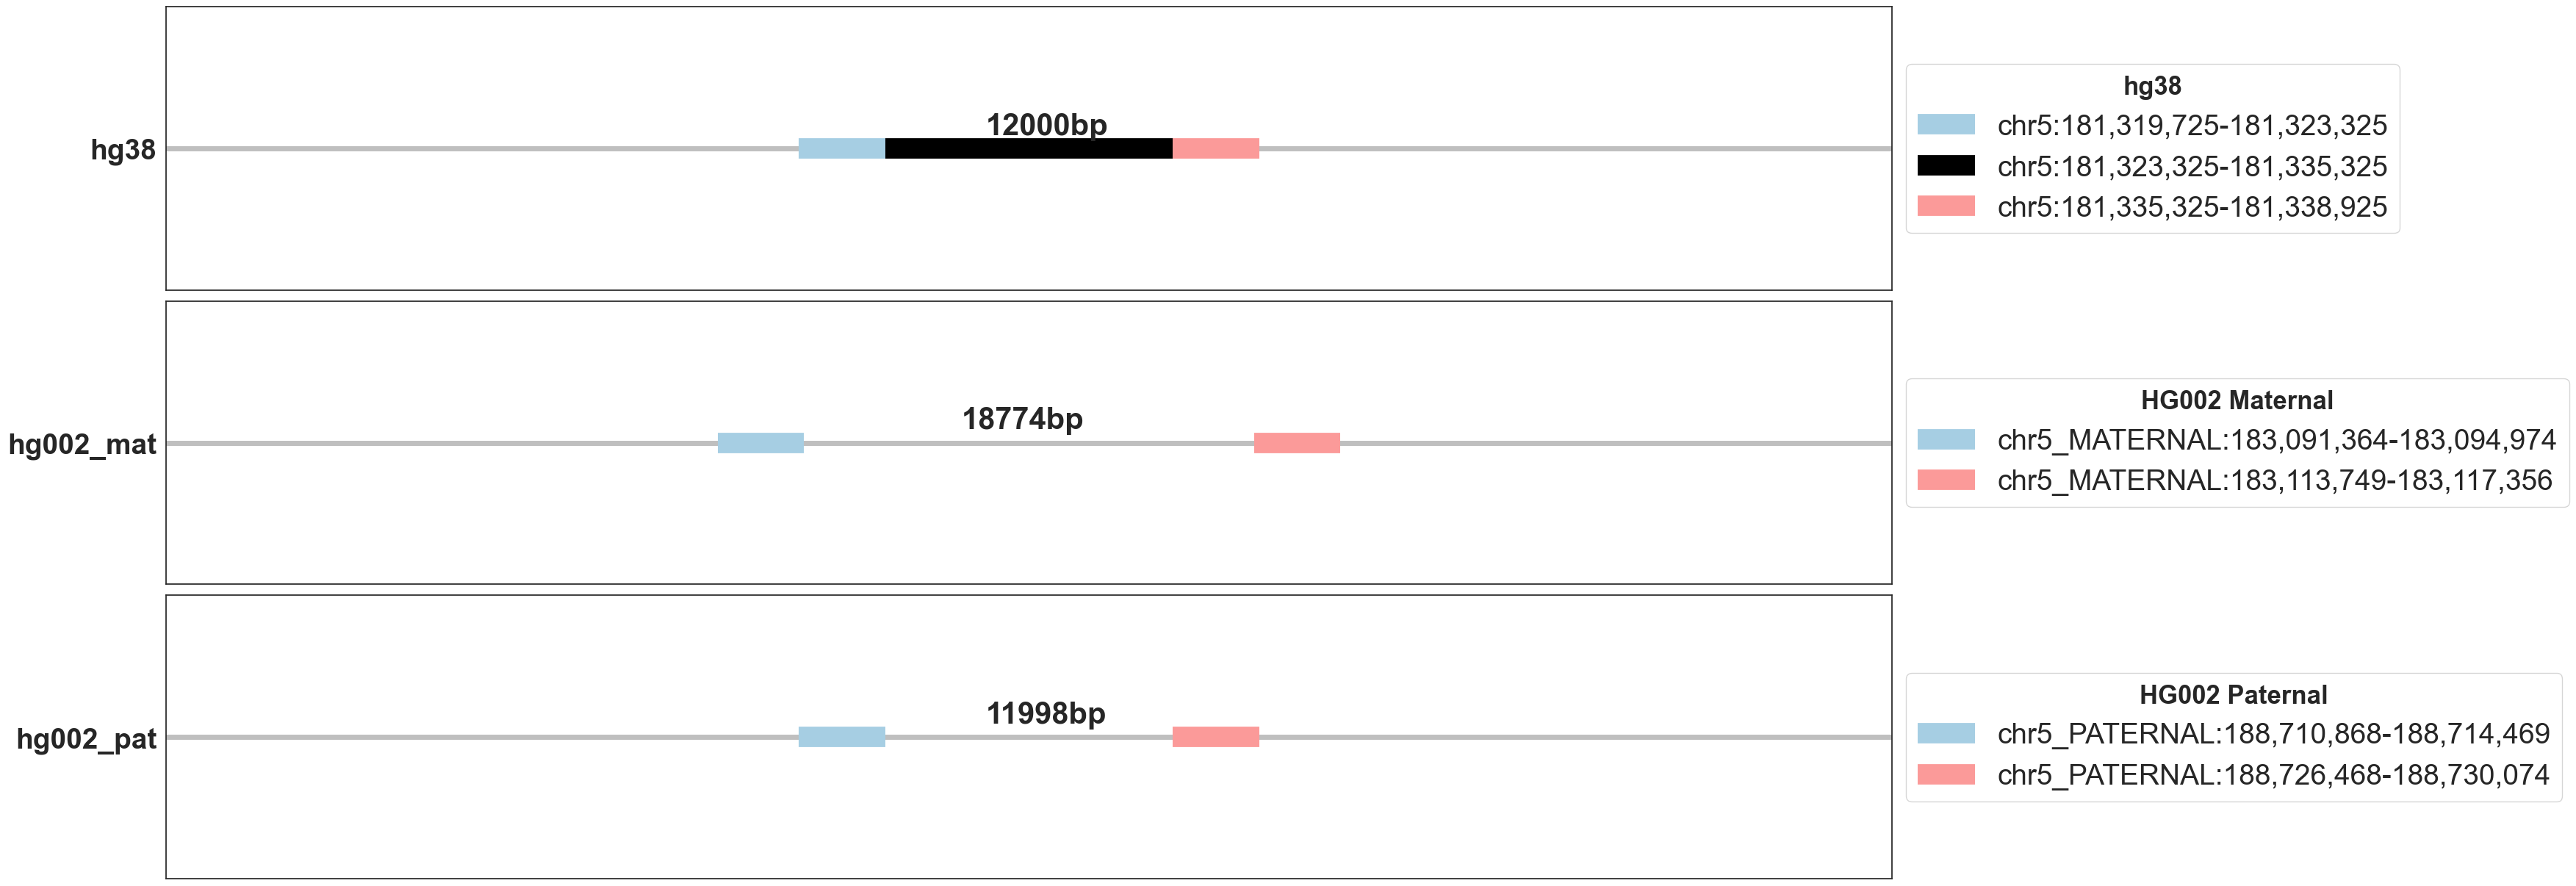

In [11]:
import T2T_ACE.alignment_visualization_utilities as avu
importlib.reload(avu)
avu.PlotIntervals(['chr5:181323325-181335325',
  'chr5:181319725-181323325',
  'chr5:181335325-181338925'], ['chr5_PATERNAL:188710868-188714469',
  'chr5_MATERNAL:183091364-183094974',
  'chr5_PATERNAL:188726468-188730074',
  'chr5_MATERNAL:183113749-183117356']).plot_intervals_comparison(flanking=True, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/')

In [12]:
v.collect_del_flankings("chr11:5601783-5602827", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr11:5601783-5602827 1045
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr11:5599783-5601783, 2001, 1, 2
right flanking interval: chr11:5602827-5604827, 2001, 1, 2
----------- No DEL Evidence -----------
chr11_PATERNAL:5659639-5661640 (2002bp), chr11_PATERNAL:5662172-5664172 (2001bp), 531
----------- No DEL Evidence -----------
chr11_MATERNAL:5632924-5634927 (2004bp), chr11_MATERNAL:5635970-5637971 (2002bp), 1042
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr11_MATERNAL:5634926-5635971; Interval Between HG2 Aligned Flankings:chr11_MATERNAL:5634928-5635969; Overlapping:(100.0, 99.62)


{'del_interval': 'chr11:5601783-5602827',
 'del_interval_size': 1045,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr11:5599783-5601783',
 'right_flanking_interval': 'chr11:5602827-5604827',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [531, 1042],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr11:5601783-5602827',
  'chr11:5599783-5601783',
  'chr11:5602827-5604827'],
 'hg2_plotting_flanking_intervals': ['chr11_PATERNAL:5659639-5661640',
  'chr11_MATERNAL:5632924-5634927',
  'chr11_PATERNAL:5662172-5664172',
  'chr11_MATERNAL:5635970-5637971'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

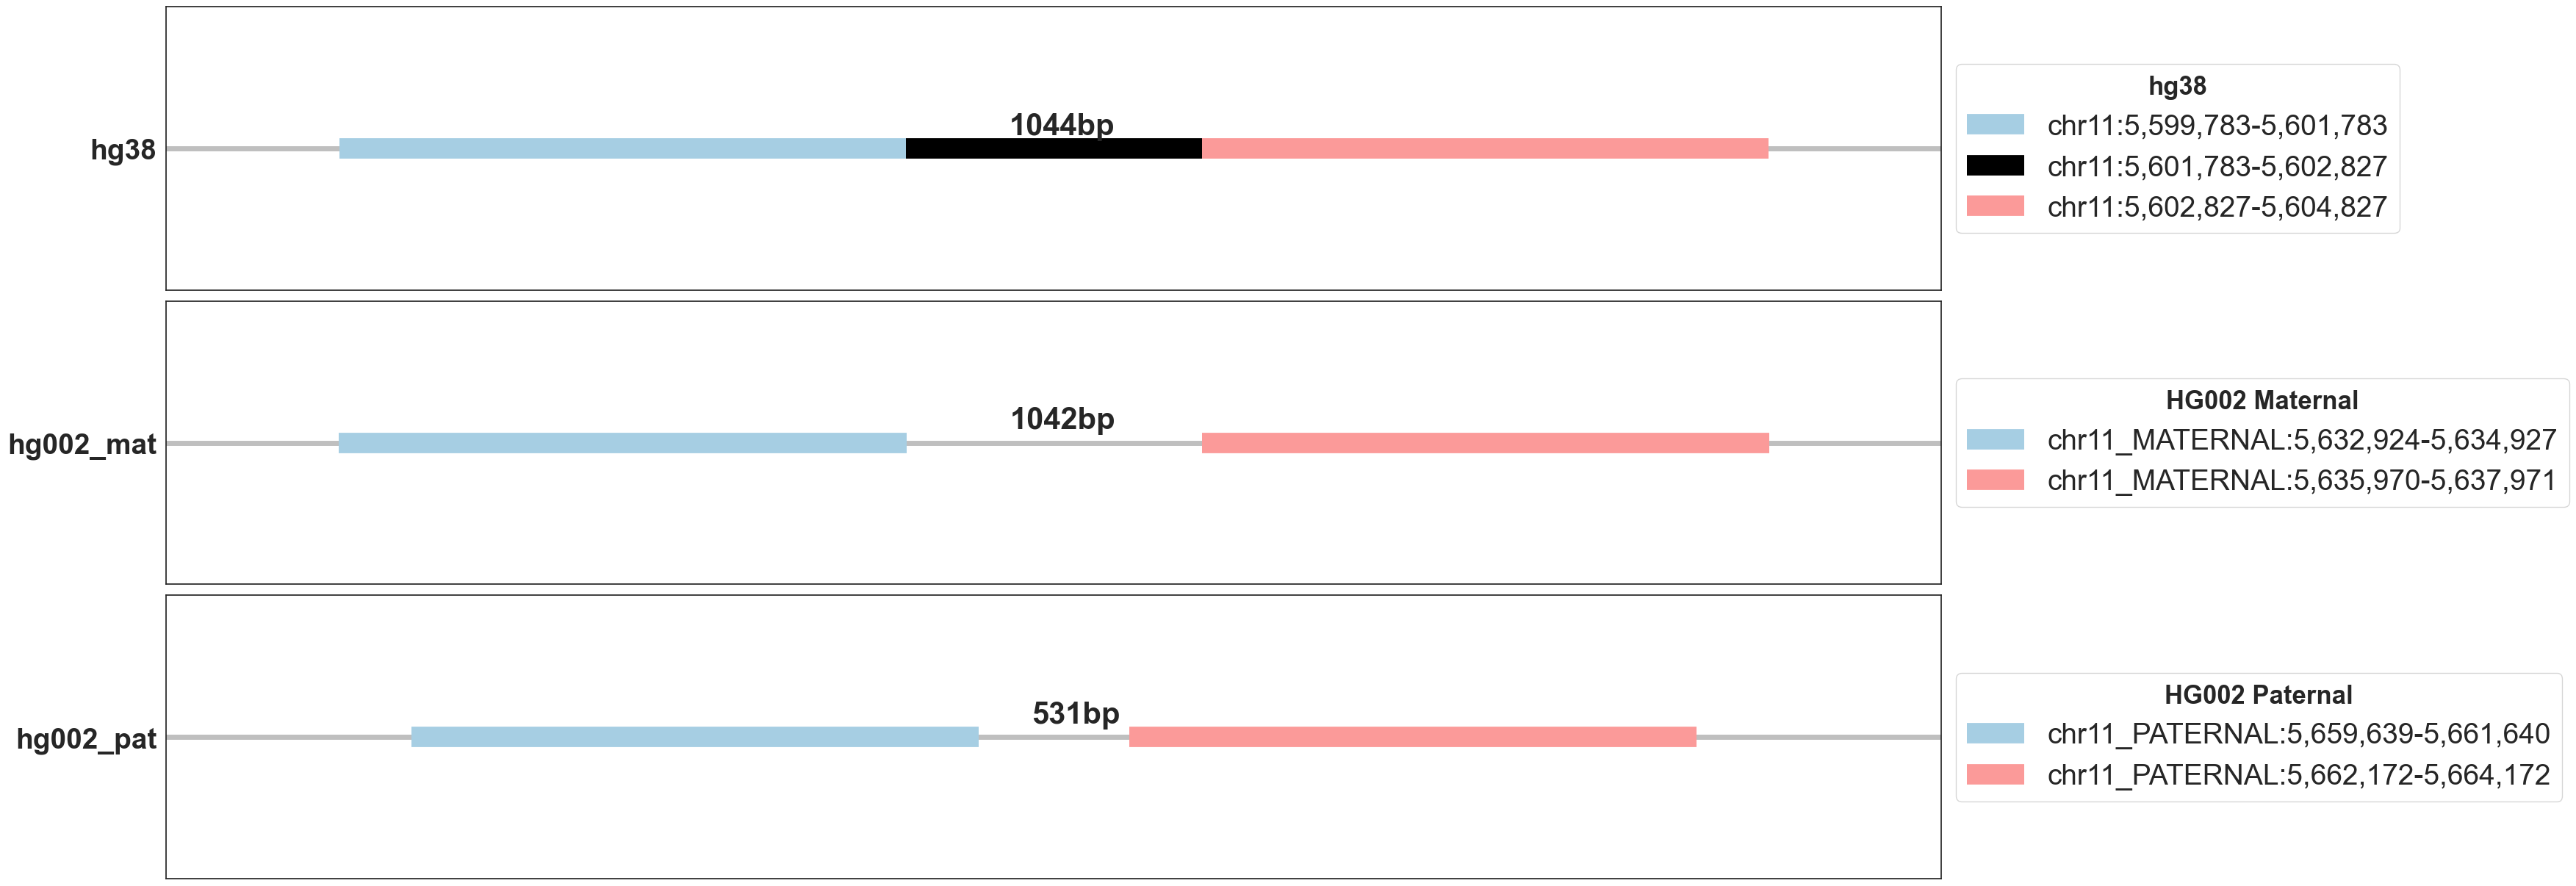

In [13]:
import T2T_ACE.alignment_visualization_utilities as avu
importlib.reload(avu)
avu.PlotIntervals(['chr11:5601783-5602827',
  'chr11:5599783-5601783',
  'chr11:5602827-5604827'], ['chr11_PATERNAL:5659639-5661640',
  'chr11_MATERNAL:5632924-5634927',
  'chr11_PATERNAL:5662172-5664172',
  'chr11_MATERNAL:5635970-5637971']).plot_intervals_comparison(flanking=True, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/')

In [14]:
importlib.reload(ip)
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [15]:
v.collect_del_flankings("chr1:13235347-13240700", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr1:13235347-13240700 5354
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:13233347-13235347, 2001, 1, 4
right flanking interval: chr1:13240700-13242700, 2001, 1, 4
----------- No DEL Evidence -----------
chr1_PATERNAL:12630587-12632588 (2002bp), chr1_PATERNAL:12623265-12625266 (2002bp), 5320
----------- No DEL Evidence -----------
chr1_MATERNAL:12666389-12668390 (2002bp), chr1_MATERNAL:12659062-12661063 (2002bp), 5325
----------- No DEL Evidence -----------
chr1_MATERNAL:12876393-12878376 (1984bp), chr1_MATERNAL:12883745-12885745 (2001bp), 5368
********** Potential DEL **********
chr1_PATERNAL:12798119-12800107 (1989bp), chr1_PATERNAL:12800107-12802097 (1991bp), -1


{'del_interval': 'chr1:13235347-13240700',
 'del_interval_size': 5354,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr1:13233347-13235347',
 'right_flanking_interval': 'chr1:13240700-13242700',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 4,
 'right_flanking_hg2_hits': 4,
 'distance_between_flankings': [5320, 5325, 5368, -1],
 'flanking_connection_strand': ['POS', 'POS', 'POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr1:13235347-13240700',
  'chr1:13233347-13235347',
  'chr1:13240700-13242700'],
 'hg2_plotting_flanking_intervals': ['chr1_PATERNAL:12630587-12632588',
  'chr1_MATERNAL:12666389-12668390',
  'chr1_MATERNAL:12876393-12878376',
  'chr1_PATERNAL:12798119-12800107',
  'chr1_PATERNAL:12623265-12625266',
  'chr1_MATERNAL:12659062-12661063',
  'chr1_MATERNAL:12883745-12885745',
  'chr1_PATERNAL:12800107-12802097'],
 'classification': 'DEL',
 'minor_classification': 'Heterozygous DEL'}

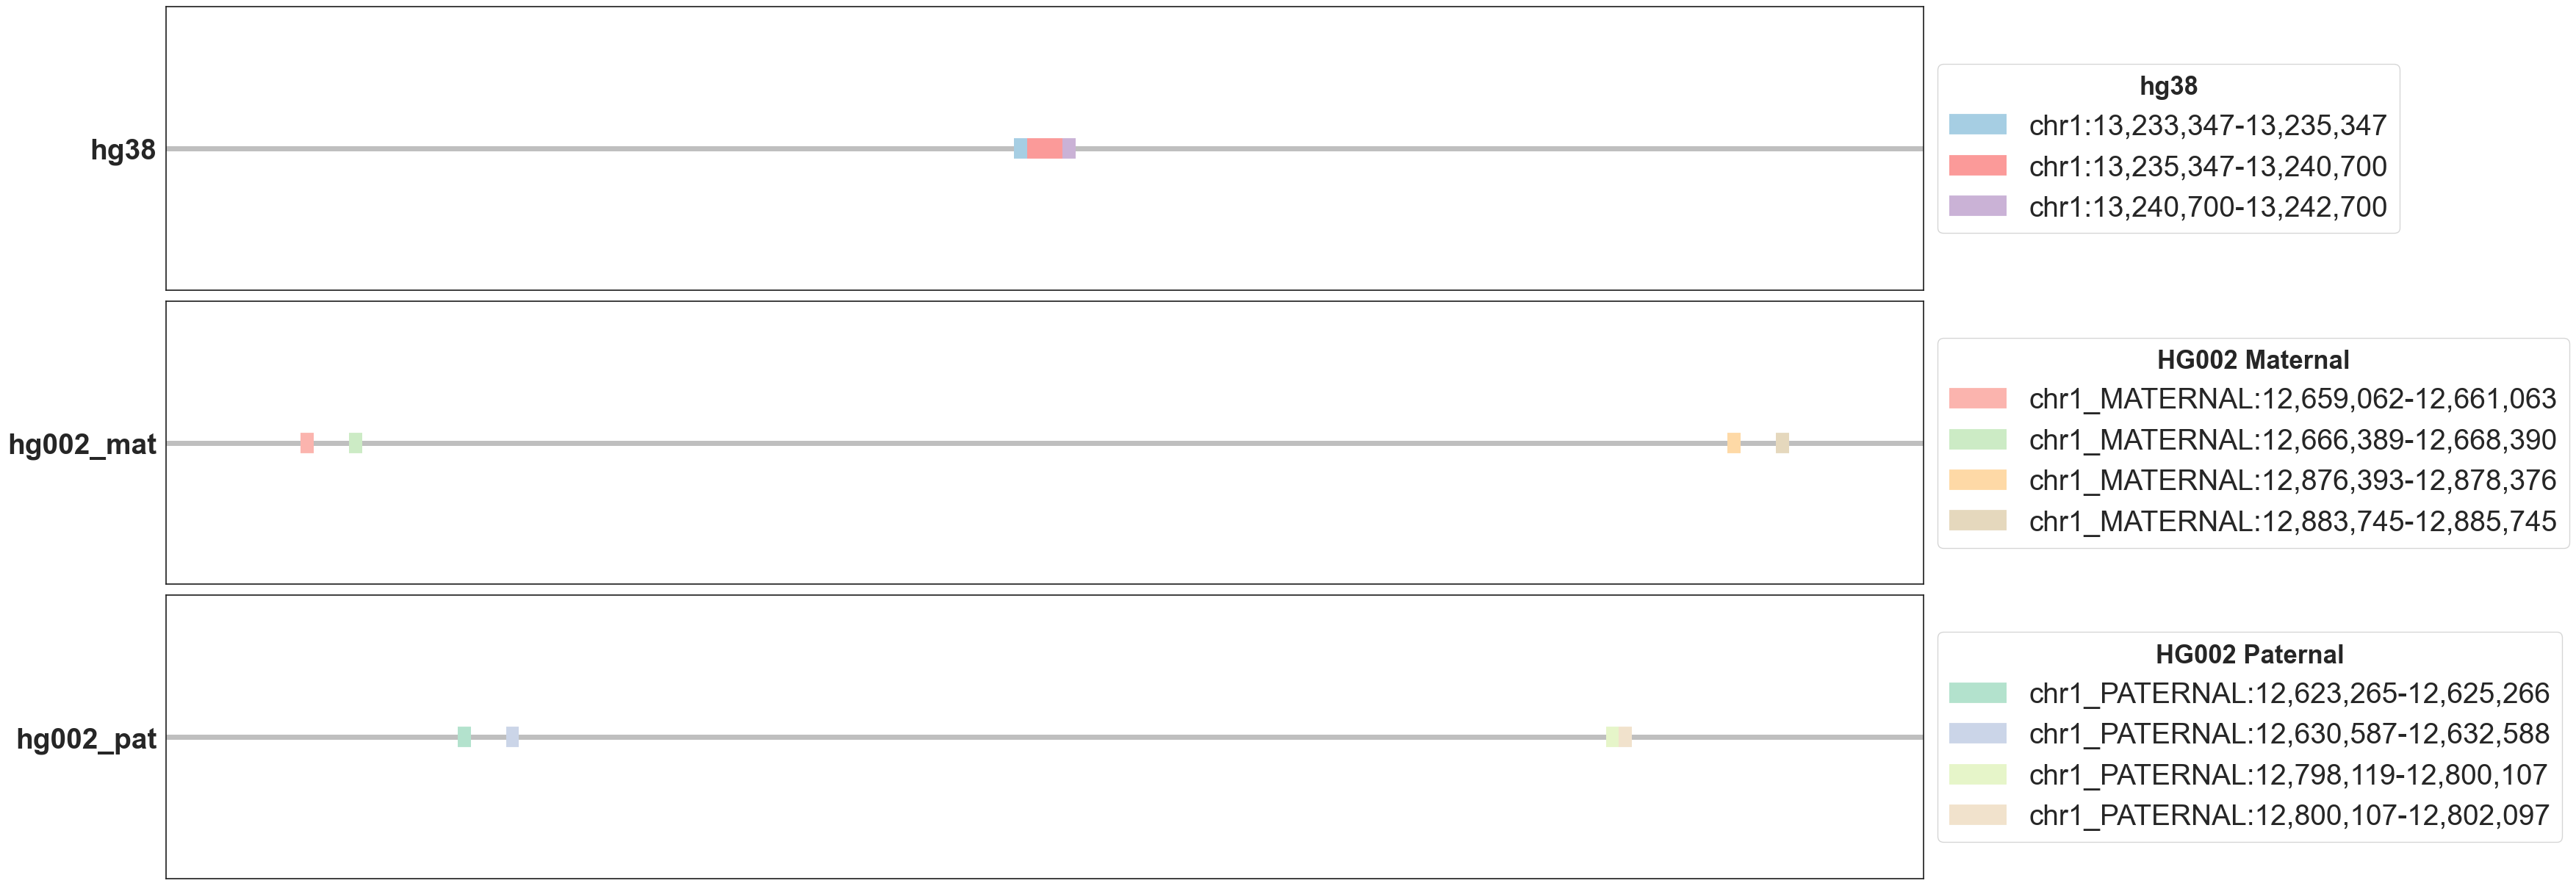

In [16]:
avu.PlotIntervals(['chr1:13235347-13240700',
  'chr1:13233347-13235347',
  'chr1:13240700-13242700'], ['chr1_PATERNAL:12630587-12632588',
  'chr1_MATERNAL:12666389-12668390',
  'chr1_MATERNAL:12876393-12878376',
  'chr1_PATERNAL:12798119-12800107',
  'chr1_PATERNAL:12623265-12625266',
  'chr1_MATERNAL:12659062-12661063',
  'chr1_MATERNAL:12883745-12885745',
  'chr1_PATERNAL:12800107-12802097']).plot_intervals_comparison(flanking=False, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/',ratio=50)

In [17]:
import T2T_ACE.duplication_evaluation as duplication_evaluation
duplication_evaluation.eval_dup_interval("chr16:22442487-22454487", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()


----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr16:22442487-22454487
hg38 dup count: 3
interval: chr16:22442486-22454487	strand: 1, start: 0, end: 12001
interval: chr16:21916238-21928256	strand: -1, start: 0, end: 12001
interval: chr16:21484749-21496754	strand: -1, start: 0, end: 12001
hg2 dup count: 8
interval: chr16_MATERNAL:21960637-21972638	strand: -1, start: 0, end: 12001
interval: chr16_MATERNAL:21617298-21629303	strand: -1, start: 0, end: 12001
interval: chr16_MATERNAL:22486871-22498883	strand: 1, start: 0, end: 12001
interval: chr16_MATERNAL:22918057-22930063	strand: 1, start: 0, end: 12001
interval: chr16_PATERNAL:22116036-22128036	strand: -1, start: 0, end: 12001
interval: chr16_PATERNAL:21772706-21784711	strand: -1, start: 0, end: 12001
interval: chr16_PATERNAL:22642329-22654341	strand: 1, start: 0, end: 12001
interval: chr16_PATERNAL

{'dup_interval': 'chr16:22442487-22454487',
 'dup_interval_size': 12001,
 'original_hg38_hit_count': 3,
 'original_hg2_hit_count': 8,
 'original_hg2_mat_hit_count': 4,
 'original_hg2_pat_hit_count': 4,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Homozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr16:22438501-22479541',
 'corrected_interval_size': 41041,
 'expanded_length': 29040,
 'corrected_hg38_hit_count': 3,
 'corrected_hg2_hit_count': 8,
 'corrected_hg2_mat_hit_count': 4,
 'corrected_hg2_pat_hit_count': 4,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 0}

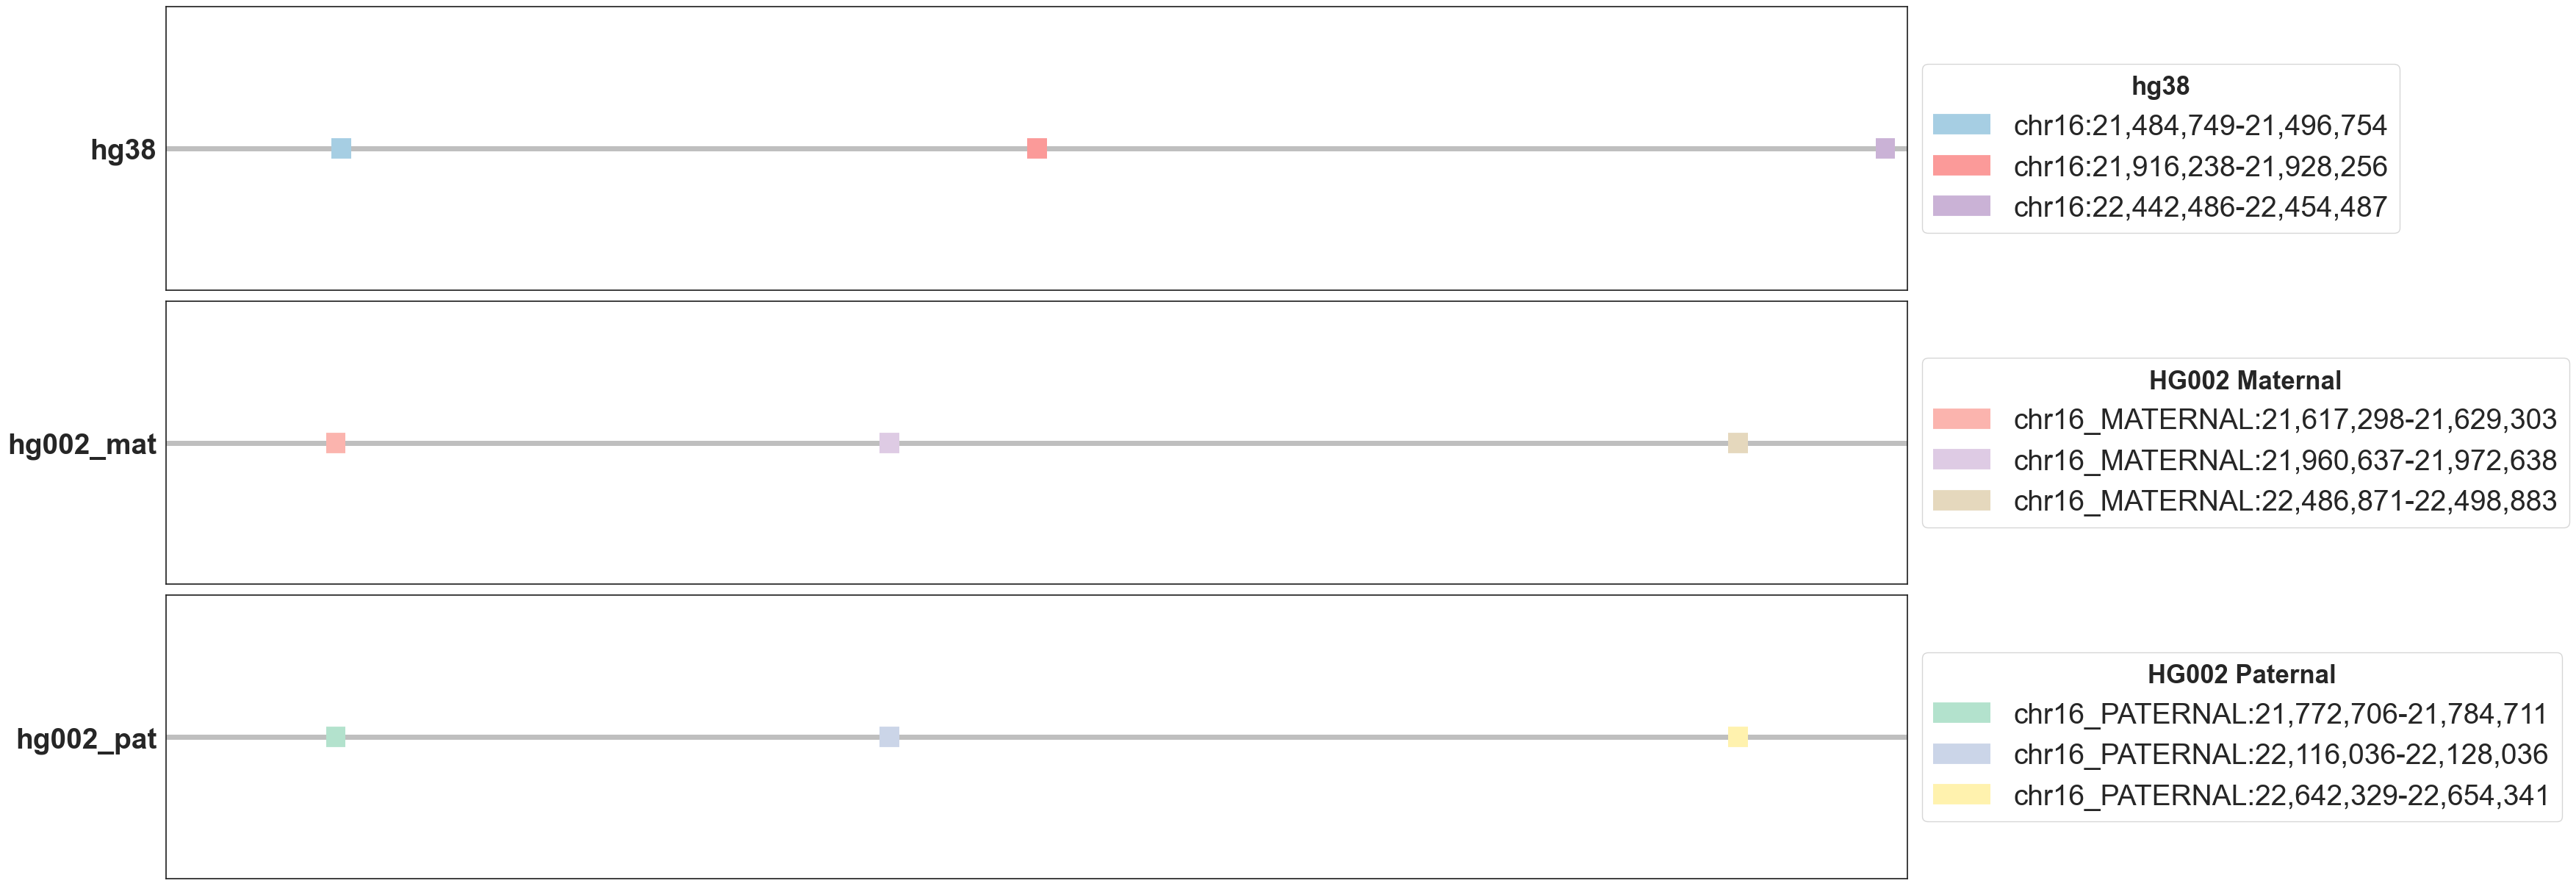

In [18]:
avu.PlotIntervals(['chr16:22442486-22454487',
  'chr16:21916238-21928256',
  'chr16:21484749-21496754'], ['chr16_MATERNAL:21960637-21972638',
  'chr16_MATERNAL:21617298-21629303',
  'chr16_MATERNAL:22486871-22498883',
  'chr16_PATERNAL:22116036-22128036',
  'chr16_PATERNAL:21772706-21784711',
  'chr16_PATERNAL:22642329-22654341']).plot_intervals_comparison(flanking=False, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/',ratio=90)

In [19]:
v.collect_del_flankings("chr14:19158706-19159327", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr14:19158706-19159327 622
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 6
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr14:19156706-19158706, 2001, 2, 10
right flanking interval: chr14:19159327-19161327, 2001, 2, 11
----------- No DEL Evidence -----------
chr14_PATERNAL:18972484-18974484 (2001bp), chr14_PATERNAL:18975104-18977105 (2002bp), 619
----------- No DEL Evidence -----------
chr14_MATERNAL:19452516-19454515 (2000bp), chr14_MATERNAL:19449870-19451872 (2003bp), 643
----------- No DEL Evidence -----------
chr14_MATERNAL:19840312-19842316 (2005bp), chr14_MATERNAL:19837288-19839289 (2002bp), 1022
********** Potential DEL **********
chr14_PATERNAL:17506947-17508942 (1996bp), chr14_PATERNAL:17508942-17510943 (2002bp), -1
----------- No DEL Evidence -----------
chr14_PATERNAL:17886364-17888363 (2000bp), chr14_PATERNAL:17968218-17970219 (2002bp), 79854
----------- No DEL Evidence -----------
chr14_MATERNAL:20555086-20557083 (1998b

{'del_interval': 'chr14:19158706-19159327',
 'del_interval_size': 622,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr14:19156706-19158706',
 'right_flanking_interval': 'chr14:19159327-19161327',
 'left_flanking_hg38_hits': 2,
 'right_flanking_hg38_hits': 2,
 'left_flanking_hg2_hits': 10,
 'right_flanking_hg2_hits': 11,
 'distance_between_flankings': [619,
  643,
  1022,
  -1,
  79854,
  79879,
  -1,
  858,
  79874,
  1035],
 'flanking_connection_strand': ['POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS'],
 'hg38_plotting_flanking_intervals': ['chr14:19158706-19159327',
  'chr14:19156706-19158706',
  'chr14:19159327-19161327'],
 'hg2_plotting_flanking_intervals': ['chr14_PATERNAL:18972484-18974484',
  'chr14_MATERNAL:19452516-19454515',
  'chr14_MATERNAL:19840312-19842316',
  'chr14_PATERNAL:17506947-17508942',
  'chr14_PATERNAL:17886364-17888363',
  'chr14_MATERNAL:20555086-20557083',
  'chr14_MATERNAL:19068761-19070745',
  'chr14_MATERNAL

In [20]:
importlib.reload(au)
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [21]:
v.align_interval("chr14:19159327-19161327", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr14_PATERNAL:18975104-18977105', 1, 0, 2001],
 ['chr14_MATERNAL:19449870-19451872', -1, 0, 2001],
 ['chr14_PATERNAL:17508942-17510943', 1, 1, 2001],
 ['chr14_MATERNAL:19066761-19068761', -1, 1, 2001],
 ['chr14_MATERNAL:20473205-20475206', 1, 1, 2001],
 ['chr14_MATERNAL:21308740-21310741', -1, 1, 2001],
 ['chr14_PATERNAL:17968218-17970219', -1, 1, 2001],
 ['chr14_MATERNAL:20927395-20929396', -1, 1, 2001],
 ['chr14_MATERNAL:19837288-19839289', -1, 1, 2001],
 ['chr14_PATERNAL:18343451-18345452', -1, 1, 2001],
 ['chr14_MATERNAL:18987943-18989942', 1, 1, 2001]]

In [22]:
v.align_interval("chr14:19159303-19161303", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr14_PATERNAL:18975080-18977081', 1, 0, 2001],
 ['chr14_MATERNAL:19449894-19451890', -1, 6, 2001],
 ['chr14_PATERNAL:17508918-17510919', 1, 1, 2001],
 ['chr14_MATERNAL:19066785-19068785', -1, 1, 2001],
 ['chr14_MATERNAL:20473188-20475182', 1, 8, 2001],
 ['chr14_PATERNAL:17968242-17970236', -1, 8, 2001],
 ['chr14_MATERNAL:21308764-21310765', -1, 1, 2001],
 ['chr14_MATERNAL:20927419-20929420', -1, 1, 2001],
 ['chr14_MATERNAL:19837312-19839313', -1, 1, 2001],
 ['chr14_PATERNAL:18343475-18345476', -1, 1, 2001],
 ['chr14_MATERNAL:18987919-18989917', 1, 1, 2000]]

In [23]:
v.collect_del_flankings("chr14:19158731-19159303", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr14:19158731-19159303 573
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 6
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr14:19156731-19158731, 2001, 2, 10
right flanking interval: chr14:19159303-19161303, 2001, 2, 11
----------- No DEL Evidence -----------
chr14_PATERNAL:18972509-18974509 (2001bp), chr14_PATERNAL:18975080-18977081 (2002bp), 570
----------- No DEL Evidence -----------
chr14_MATERNAL:19452491-19454490 (2000bp), chr14_MATERNAL:19449894-19451890 (1997bp), 600
----------- No DEL Evidence -----------
chr14_MATERNAL:19840287-19842291 (2005bp), chr14_MATERNAL:19837312-19839313 (2002bp), 973
----------- No DEL Evidence -----------
chr14_PATERNAL:17886389-17888388 (2000bp), chr14_PATERNAL:17968242-17970236 (1995bp), 79853
----------- No DEL Evidence -----------
chr14_MATERNAL:20555061-20557058 (1998bp), chr14_MATERNAL:20473188-20475182 (1995bp), 79878
********** Potential DEL **********
chr14_PATERNAL:17506972-17508967 (199

{'del_interval': 'chr14:19158731-19159303',
 'del_interval_size': 573,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr14:19156731-19158731',
 'right_flanking_interval': 'chr14:19159303-19161303',
 'left_flanking_hg38_hits': 2,
 'right_flanking_hg38_hits': 2,
 'left_flanking_hg2_hits': 10,
 'right_flanking_hg2_hits': 11,
 'distance_between_flankings': [570,
  600,
  973,
  79853,
  79878,
  -50,
  -50,
  827,
  79891,
  986],
 'flanking_connection_strand': ['POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS',
  'POS'],
 'hg38_plotting_flanking_intervals': ['chr14:19158731-19159303',
  'chr14:19156731-19158731',
  'chr14:19159303-19161303'],
 'hg2_plotting_flanking_intervals': ['chr14_PATERNAL:18972509-18974509',
  'chr14_MATERNAL:19452491-19454490',
  'chr14_MATERNAL:19840287-19842291',
  'chr14_PATERNAL:17886389-17888388',
  'chr14_MATERNAL:20555061-20557058',
  'chr14_PATERNAL:17506972-17508967',
  'chr14_MATERNAL:19068736-19070720',
  'chr14_MATERNAL

In [24]:
importlib.reload(v)
v.collect_del_flankings("chr7:566775-567340", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr7:566775-567340 566
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr7:564775-566775, 2001, 1, 2
right flanking interval: chr7:567340-569340, 2001, 1, 2
----------- No DEL Evidence -----------
chr7_MATERNAL:669720-671724 (2005bp), chr7_MATERNAL:672317-674317 (2001bp), 592
----------- No DEL Evidence -----------
chr7_PATERNAL:665442-667446 (2005bp), chr7_PATERNAL:668039-670039 (2001bp), 592
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr7_MATERNAL:672565-673108; Interval Between HG2 Aligned Flankings:chr7_MATERNAL:671725-672316; Overlapping:(-41.89, -45.59)
DEL HG2 alignment:chr7_PATERNAL:668287-668830; Interval Between HG2 Aligned Flankings:chr7_PATERNAL:667447-668038; Overlapping:(-41.89, -45.59)


{'del_interval': 'chr7:566775-567340',
 'del_interval_size': 566,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr7:564775-566775',
 'right_flanking_interval': 'chr7:567340-569340',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [592, 592],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr7:566775-567340',
  'chr7:564775-566775',
  'chr7:567340-569340'],
 'hg2_plotting_flanking_intervals': ['chr7_MATERNAL:669720-671724',
  'chr7_PATERNAL:665442-667446',
  'chr7_MATERNAL:672317-674317',
  'chr7_PATERNAL:668039-670039'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

In [25]:
v.align_interval("chr7:566775-567340", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr7_MATERNAL:672565-673108', 1, 0, 553],
 ['chr7_PATERNAL:668287-668830', 1, 0, 553]]

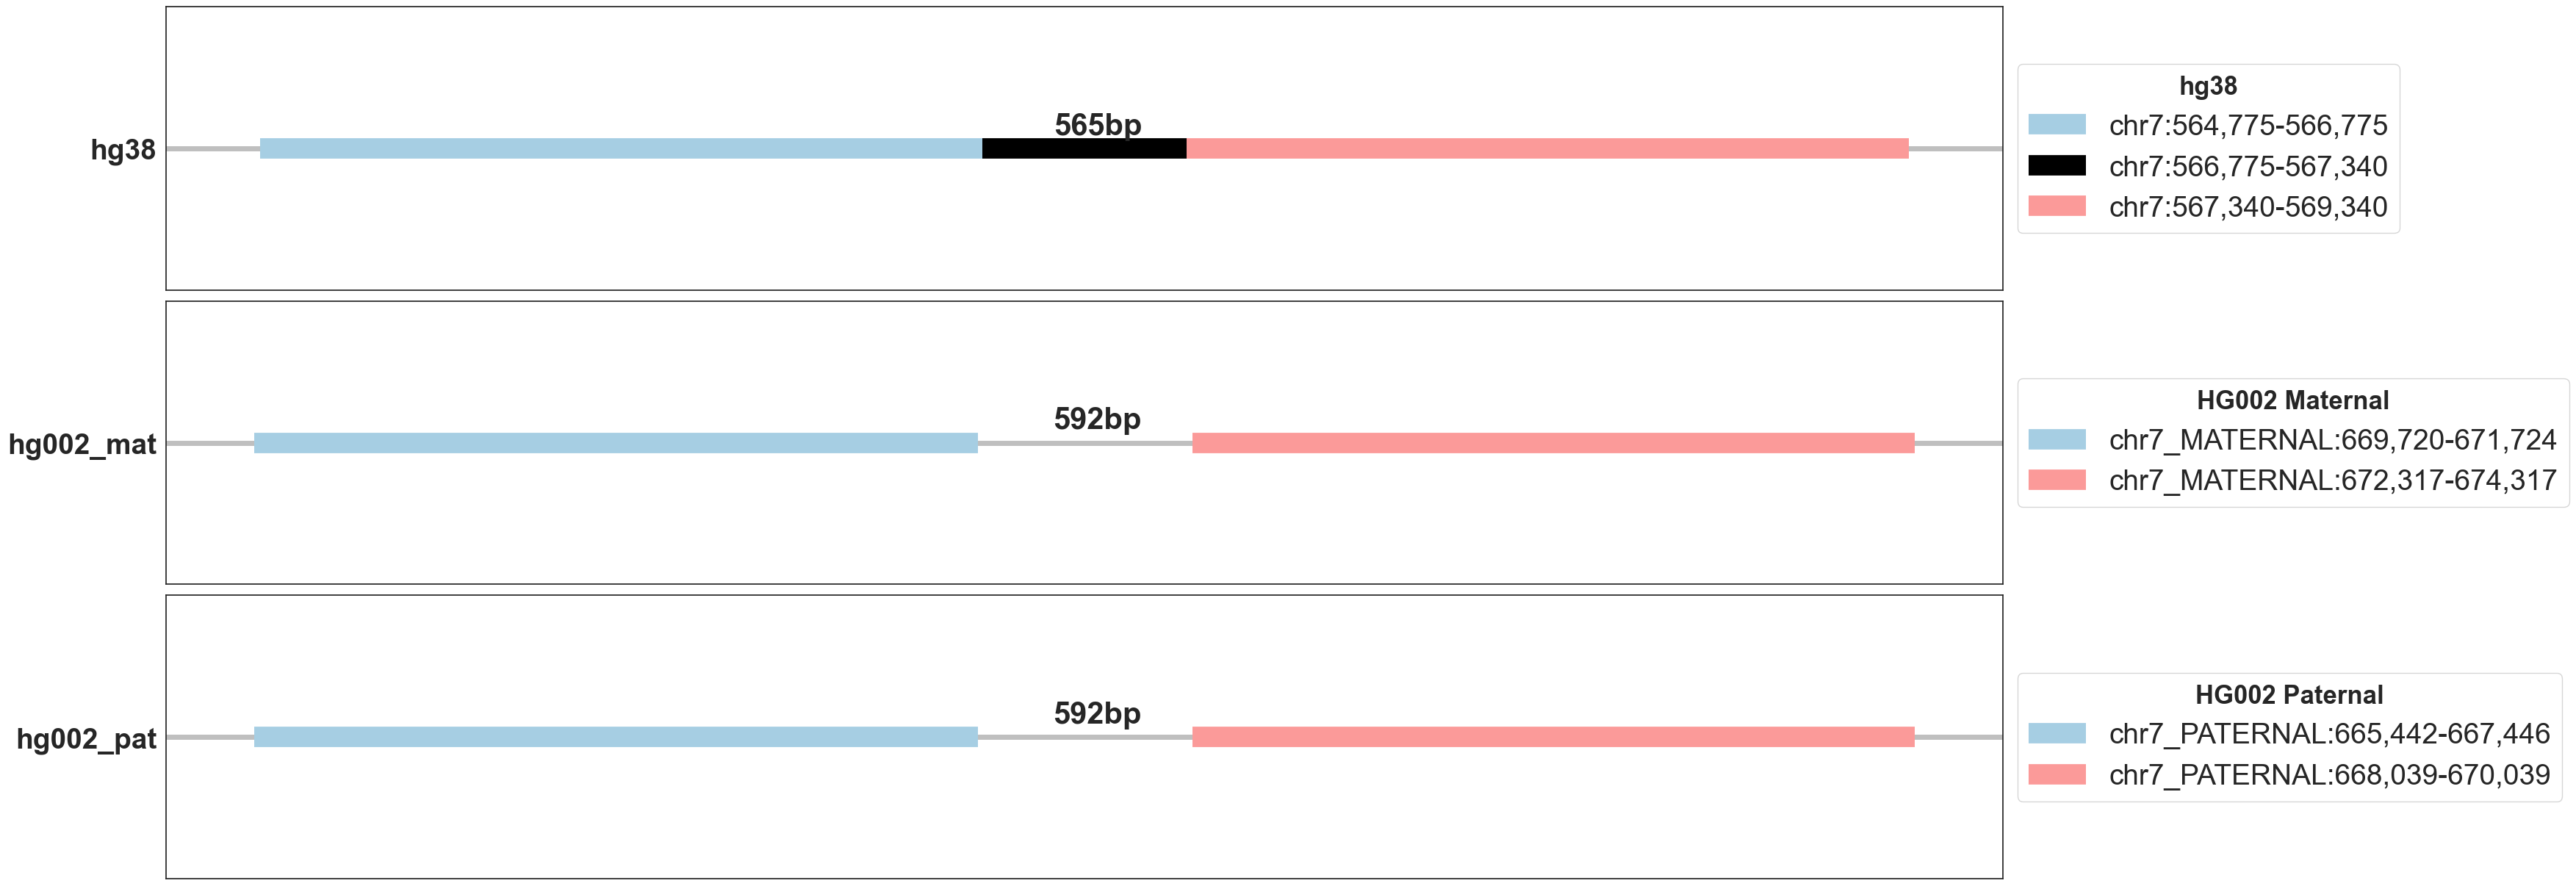

In [27]:
avu.PlotIntervals(['chr7:566775-567340',
  'chr7:564775-566775',
  'chr7:567340-569340'],
['chr7_MATERNAL:669720-671724',
  'chr7_PATERNAL:665442-667446',
  'chr7_MATERNAL:672317-674317',
  'chr7_PATERNAL:668039-670039']).plot_intervals_comparison(flanking=True, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/',ratio=9)

In [ ]:
['chr7_MATERNAL:669720-671724','chr7_MATERNAL:672317-674317']
['chr7_PATERNAL:665442-667446', 'chr7_PATERNAL:668039-670039']

In [ ]:
'chr7_MATERNAL:671724-672317'
'chr7_PATERNAL:667446-668039'

In [6]:
v.get_sequence_from_interval(ReferenceLocations.hg002t2t, 'chr7_MATERNAL:671724-672317')

'ATCTCAGCACCTCCACCATCGTTATCACCATCACCACCAGCATCACCATCACCACAACCATCATTACCATCTTCACCATGACCATCGTCATCATCATCACTATCATCTTCATCACCATCATGATCATCACCACCATCATCGCCACCATCATCACCATCGCCTCCACCATCACTATCACTGTCATCACCTTCACATCACCATTACCACCATTACCTTCATCACCATTGTCATCACATCACCTTCATCACTATCATCACCATCATCAGCACCTTGATCACCATCATCACCACCACCACCATTATCACTATCACCTTCATCATCACCACCATCATATCACATTATCATCACCATCTTCACCATCTCATCATCACCATCACCTTCATCACCATCATCACCATCTAATCACCTCCACCATCATTATCACCATCATCACCATCACAACCATCATCACCATTTTCACCATGACCATCATGATCATCACCTTCATTATCACCATCATCTTCATCTTCACCATTATCAACACCACCATCACCTCCACCATCACTATCACTGTTACCACCTTCACCATCACCATTACCATTACCTTCATCACTA'

In [28]:
v.collect_del_flankings("chr7:1273189-1273880", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr7:1273189-1273880 692
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 8
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr7:1271189-1273189, 2001, 1, 2
right flanking interval: chr7:1273880-1275880, 2001, 1, 2
----------- No DEL Evidence -----------
chr7_PATERNAL:1380502-1382772 (2271bp), chr7_PATERNAL:1385092-1387023 (1932bp), 2319
----------- No DEL Evidence -----------
chr7_MATERNAL:1381096-1383385 (2290bp), chr7_MATERNAL:1385446-1387377 (1932bp), 2060
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr7_PATERNAL:1384964-1385348; Interval Between HG2 Aligned Flankings:chr7_PATERNAL:1382773-1385091; Overlapping:(5.52, 33.25)
DEL HG2 alignment:chr7_PATERNAL:1384964-1385348; Interval Between HG2 Aligned Flankings:chr7_PATERNAL:1382773-1385091; Overlapping:(5.52, 33.25)
DEL HG2 alignment:chr7_PATERNAL:1384964-1385337; Interval Between HG2 Aligned Flankings:chr7_PATERNAL:1382773-1385091; Overlapping:(5.5

{'del_interval': 'chr7:1273189-1273880',
 'del_interval_size': 692,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr7:1271189-1273189',
 'right_flanking_interval': 'chr7:1273880-1275880',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [2319, 2060],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr7:1273189-1273880',
  'chr7:1271189-1273189',
  'chr7:1273880-1275880'],
 'hg2_plotting_flanking_intervals': ['chr7_PATERNAL:1380502-1382772',
  'chr7_MATERNAL:1381096-1383385',
  'chr7_PATERNAL:1385092-1387023',
  'chr7_MATERNAL:1385446-1387377'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

In [31]:
v.align_interval("chr7:1273189-1273880", ReferenceLocations.hg38, hg38, hg002t2t)[0]

[['chr7:1273188-1273880', 1, 0, 692], ['chr7:1273152-1273813', 1, 31, 692]]

In [32]:
v.align_interval("chr7:1273189-1273880", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr7_PATERNAL:1384964-1385348', 1, 213, 685],
 ['chr7_MATERNAL:1385318-1385702', 1, 213, 685],
 ['chr7_MATERNAL:1385318-1385702', 1, 79, 551],
 ['chr7_PATERNAL:1384964-1385348', 1, 79, 551],
 ['chr7_PATERNAL:1384964-1385337', 1, 146, 608],
 ['chr7_MATERNAL:1385318-1385691', 1, 146, 608],
 ['chr7_PATERNAL:1384964-1385348', 1, 31, 417],
 ['chr7_MATERNAL:1385318-1385702', 1, 31, 417]]

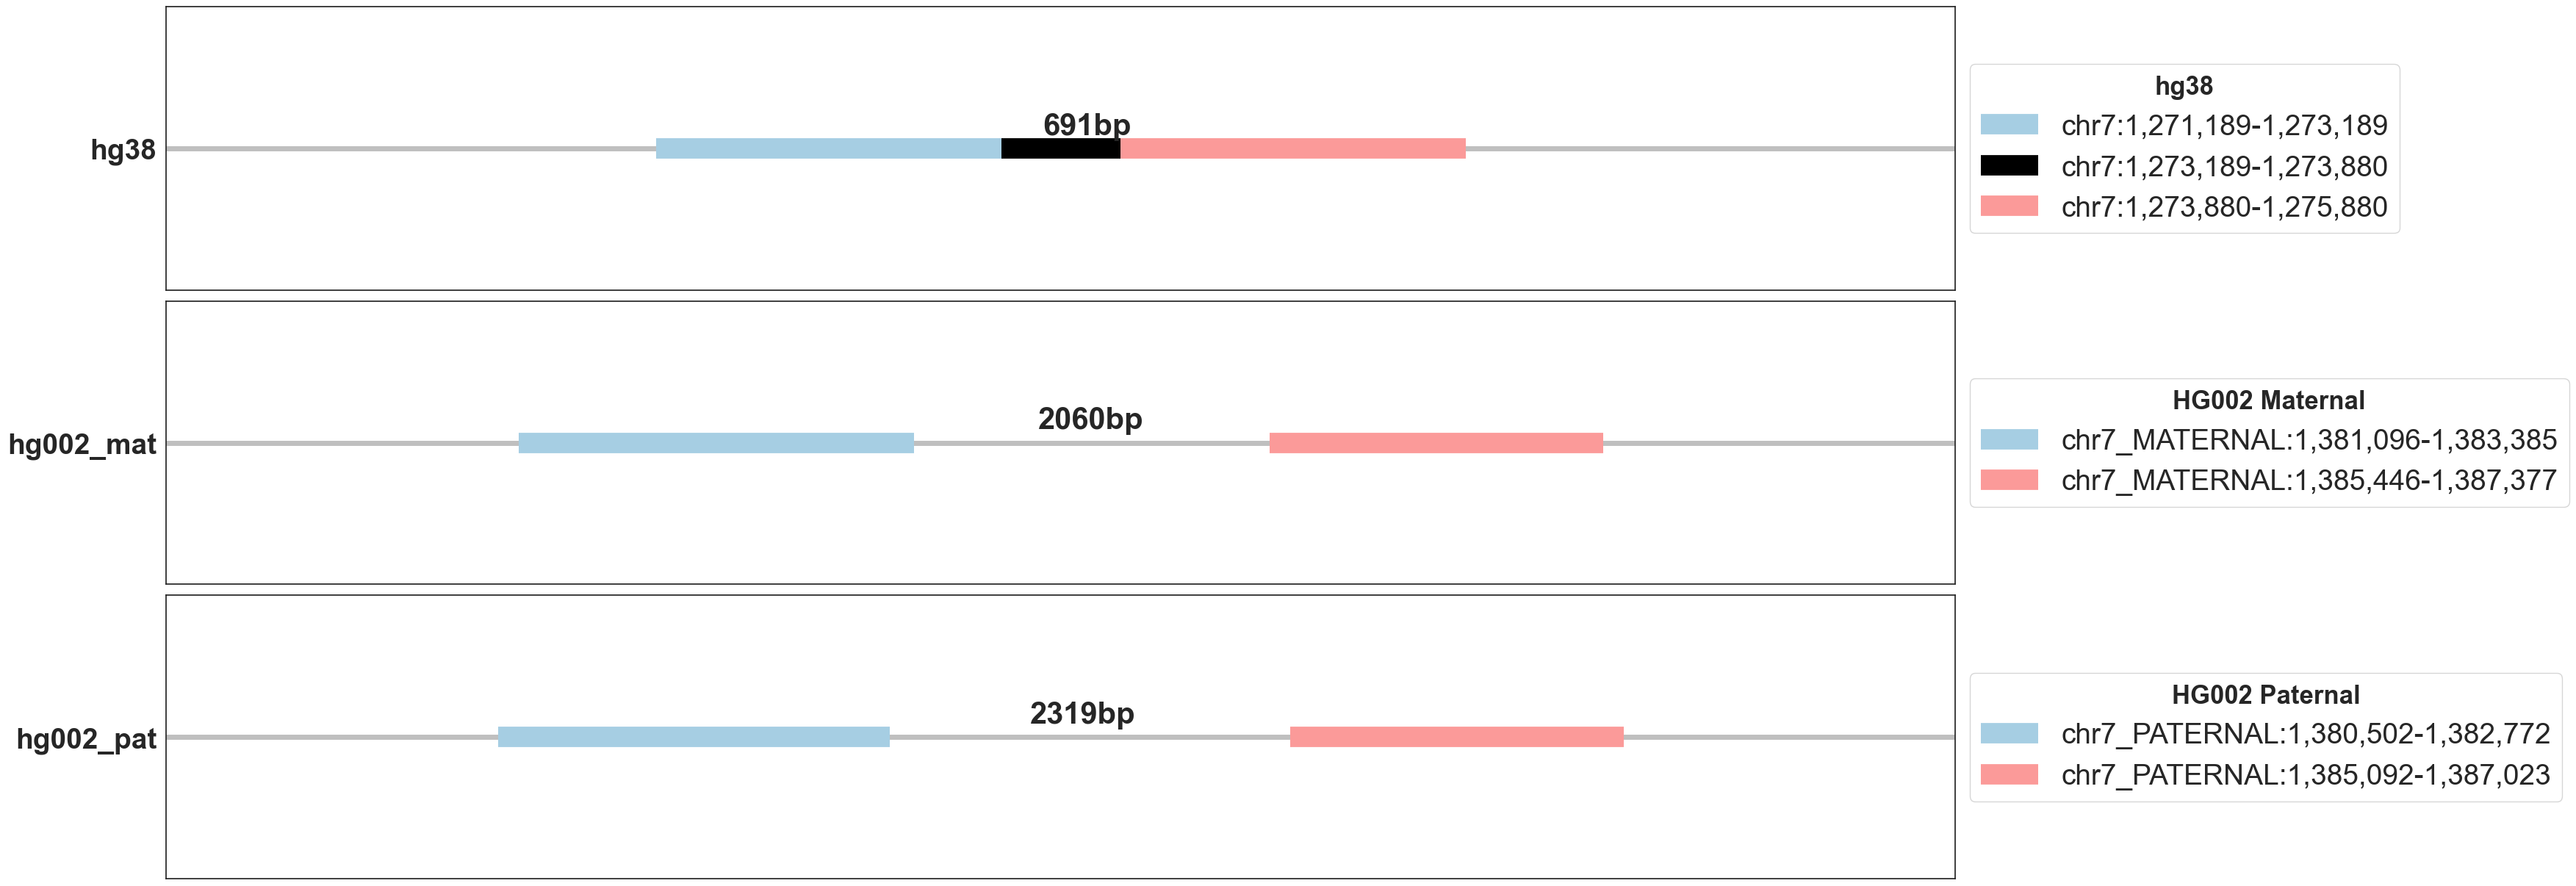

In [33]:
avu.PlotIntervals(['chr7:1273189-1273880',
  'chr7:1271189-1273189',
  'chr7:1273880-1275880'],
['chr7_PATERNAL:1380502-1382772',
  'chr7_MATERNAL:1381096-1383385',
  'chr7_PATERNAL:1385092-1387023',
  'chr7_MATERNAL:1385446-1387377']).plot_intervals_comparison(flanking=True, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/',ratio=15)

In [34]:
v.collect_del_flankings("chr16:34176544-34178323", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr16:34176544-34178323 1780
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr16:34174544-34176544, 2001, 1, 2
right flanking interval: chr16:34178323-34180323, 2001, 1, 2
----------- No DEL Evidence -----------
chr16_PATERNAL:34787523-34789524 (2002bp), chr16_PATERNAL:34791302-34793303 (2002bp), 1777
----------- No DEL Evidence -----------
chr16_MATERNAL:35988632-35990633 (2002bp), chr16_MATERNAL:35992411-35994412 (2002bp), 1777
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr16_PATERNAL:34789523-34791303; Interval Between HG2 Aligned Flankings:chr16_PATERNAL:34789525-34791301; Overlapping:(100.0, 99.78)
DEL HG2 alignment:chr16_MATERNAL:35990632-35992412; Interval Between HG2 Aligned Flankings:chr16_MATERNAL:35990634-35992410; Overlapping:(100.0, 99.78)


{'del_interval': 'chr16:34176544-34178323',
 'del_interval_size': 1780,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr16:34174544-34176544',
 'right_flanking_interval': 'chr16:34178323-34180323',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [1777, 1777],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr16:34176544-34178323',
  'chr16:34174544-34176544',
  'chr16:34178323-34180323'],
 'hg2_plotting_flanking_intervals': ['chr16_PATERNAL:34787523-34789524',
  'chr16_MATERNAL:35988632-35990633',
  'chr16_PATERNAL:34791302-34793303',
  'chr16_MATERNAL:35992411-35994412'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

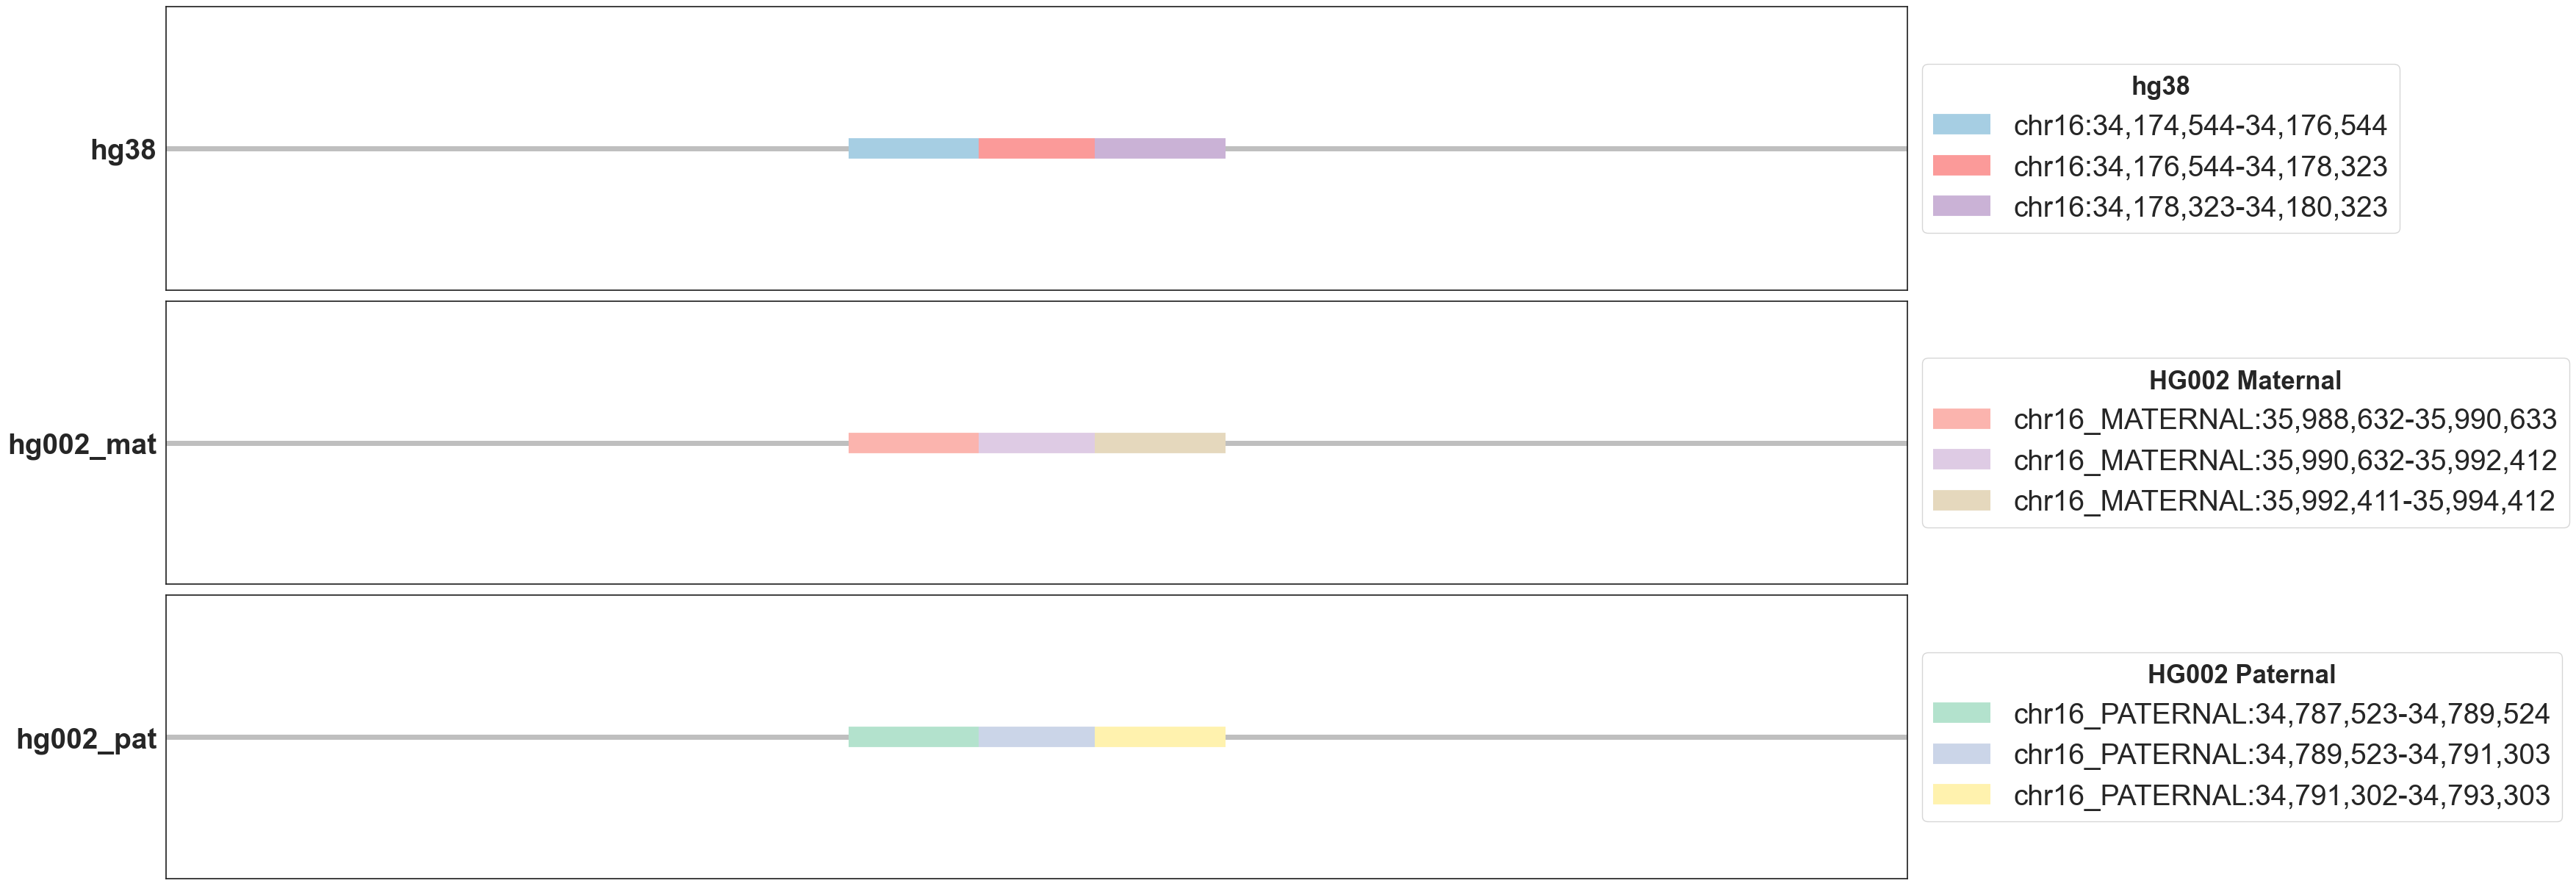

In [37]:
avu.PlotIntervals(['chr16:34176544-34178323',
  'chr16:34174544-34176544',
  'chr16:34178323-34180323'],
['chr16_PATERNAL:34787523-34789524',
  'chr16_MATERNAL:35988632-35990633',
  'chr16_PATERNAL:34791302-34793303',
  'chr16_MATERNAL:35992411-35994412',
 'chr16_PATERNAL:34789523-34791303',
 "chr16_MATERNAL:35990632-35992412"]).plot_intervals_comparison(flanking=False, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/',ratio=15)

In [39]:
importlib.reload(v)
v.collect_del_flankings("chr16:34182721-34183891", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr16:34182721-34183891 1171
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr16:34180721-34182721, 2001, 1, 2
right flanking interval: chr16:34183891-34185891, 2001, 1, 2
----------- No DEL Evidence -----------
chr16_MATERNAL:35994809-35996810 (2002bp), chr16_MATERNAL:35997979-35999980 (2002bp), 1168
----------- No DEL Evidence -----------
chr16_PATERNAL:34793700-34795701 (2002bp), chr16_PATERNAL:34796870-34798871 (2002bp), 1168
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr16_MATERNAL:35996809-35997980; Interval Between HG2 Aligned Flankings:chr16_MATERNAL:35996811-35997978; Overlapping:(100.0, 99.66)
*DEL HG2 alignment:chr16_PATERNAL:34795700-34796871; Interval Between HG2 Aligned Flankings:chr16_PATERNAL:34795702-34796869; Overlapping:(100.0, 99.66)


{'del_interval': 'chr16:34182721-34183891',
 'del_interval_size': 1171,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr16:34180721-34182721',
 'right_flanking_interval': 'chr16:34183891-34185891',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [1168, 1168],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr16:34182721-34183891',
  'chr16:34180721-34182721',
  'chr16:34183891-34185891'],
 'hg2_plotting_flanking_intervals': ['chr16_MATERNAL:35994809-35996810',
  'chr16_PATERNAL:34793700-34795701',
  'chr16_MATERNAL:35997979-35999980',
  'chr16_PATERNAL:34796870-34798871'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

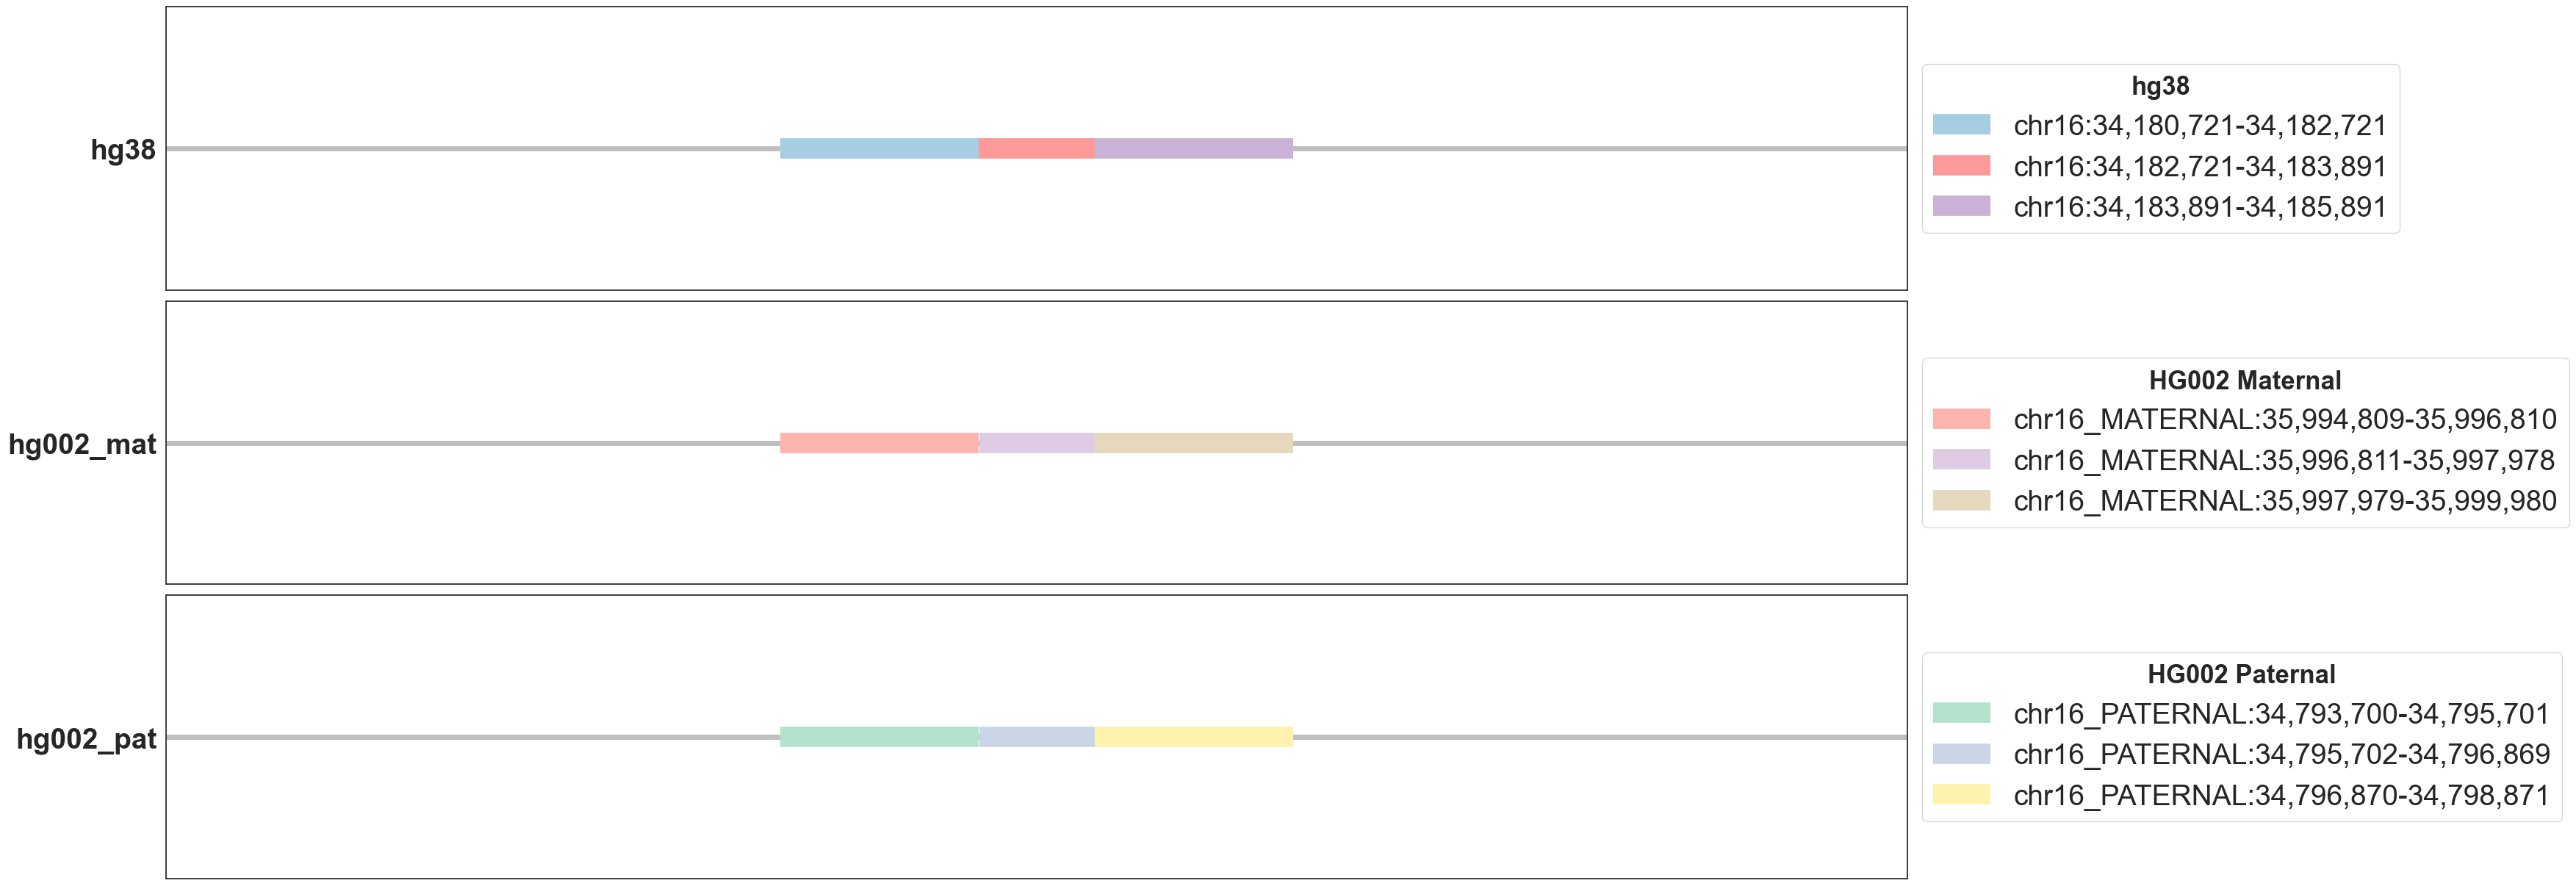

In [41]:
avu.PlotIntervals(['chr16:34182721-34183891',
  'chr16:34180721-34182721',
  'chr16:34183891-34185891'],
['chr16_MATERNAL:35994809-35996810',
  'chr16_PATERNAL:34793700-34795701',
  'chr16_MATERNAL:35997979-35999980',
  'chr16_PATERNAL:34796870-34798871',
  'chr16_MATERNAL:35996811-35997978',
  'chr16_PATERNAL:34795702-34796869'
]).plot_intervals_comparison(flanking=False, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/',ratio=15)

In [4]:
v.collect_del_flankings("chr18:54536615-54537540", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr18:54536615-54537540 926
DEL interval Alignments in hg38: 0
DEL interval Alignments in HG2: 0
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr18:54534615-54536615, 2001, 1, 2
right flanking interval: chr18:54537540-54539540, 2001, 1, 2
----------- No DEL Evidence -----------
chr18_MATERNAL:53339404-53341364 (1961bp), chr18_MATERNAL:53342293-53344294 (2002bp), 928
----------- No DEL Evidence -----------
chr18_PATERNAL:54973977-54975937 (1961bp), chr18_PATERNAL:54976866-54978864 (1999bp), 928
----------- Checking DEL Sequence Alignment in HG2 -----------


{'del_interval': 'chr18:54536615-54537540',
 'del_interval_size': 926,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr18:54534615-54536615',
 'right_flanking_interval': 'chr18:54537540-54539540',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [928, 928],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr18:54536615-54537540',
  'chr18:54534615-54536615',
  'chr18:54537540-54539540'],
 'hg2_plotting_flanking_intervals': ['chr18_MATERNAL:53339404-53341364',
  'chr18_PATERNAL:54973977-54975937',
  'chr18_MATERNAL:53342293-53344294',
  'chr18_PATERNAL:54976866-54978864'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

In [5]:
v.collect_del_flankings("chr19:24390753-24391430", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr19:24390753-24391430 678
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr19:24388753-24390753, 2001, 1, 2
right flanking interval: chr19:24391430-24393430, 2001, 1, 2
----------- No DEL Evidence -----------
chr19_MATERNAL:24661559-24663560 (2002bp), chr19_MATERNAL:24664236-24666237 (2002bp), 675
----------- No DEL Evidence -----------
chr19_PATERNAL:24622150-24624151 (2002bp), chr19_PATERNAL:24624827-24626828 (2002bp), 675
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr19_MATERNAL:24663559-24664237; Interval Between HG2 Aligned Flankings:chr19_MATERNAL:24663561-24664235; Overlapping:(100.0, 99.41)
*DEL HG2 alignment:chr19_PATERNAL:24624150-24624828; Interval Between HG2 Aligned Flankings:chr19_PATERNAL:24624152-24624826; Overlapping:(100.0, 99.41)


{'del_interval': 'chr19:24390753-24391430',
 'del_interval_size': 678,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr19:24388753-24390753',
 'right_flanking_interval': 'chr19:24391430-24393430',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [675, 675],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr19:24390753-24391430',
  'chr19:24388753-24390753',
  'chr19:24391430-24393430'],
 'hg2_plotting_flanking_intervals': ['chr19_MATERNAL:24661559-24663560',
  'chr19_PATERNAL:24622150-24624151',
  'chr19_MATERNAL:24664236-24666237',
  'chr19_PATERNAL:24624827-24626828'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

In [6]:
v.align_interval("chr16:34182721-34183891", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr16_PATERNAL:34795700-34796871', 1, 0, 1171],
 ['chr16_MATERNAL:35996809-35997980', 1, 0, 1171]]

In [7]:
v.align_interval("chr16:34182721-34183891", ReferenceLocations.hg38, hg38, hg002t2t)[0]

[['chr16:34182720-34183891', 1, 0, 1171]]

In [14]:
hg38_interval = v.align_interval("chr16:34182721-34183891", ReferenceLocations.hg38, hg38, hg002t2t)[0][0][0]
hg2_intervals = [i[0] for i in v.align_interval("chr16:34182721-34183891", ReferenceLocations.hg38, hg38, hg002t2t)[1]]

seq_dict = {}
seq_dict[hg38_interval] = v.get_sequence_from_interval(ReferenceLocations.hg38, hg38_interval)
for i in hg2_intervals:
    seq_dict[i] = v.get_sequence_from_interval(ReferenceLocations.hg002t2t, i)

seq_dict

{'chr16:34182720-34183891': 'TATCCCTTTGCAGATTCTACAAAAAGACTCTTTACACATTGCTCAATCAAAAGAATATTTCAACTCTGTGACGTGAATGCTCACATCACCAGGATGTTTCTCAGAAAGCTTCTGTGTAGTTTTTATGTGAAGATATTTCCTTCTTCACCATACGCCTCAAAGGGCTCACAAATATCCCTTTGCAGATTTTACAAGAAAAGAGTTTCCAATCTTCTCAATGAAAAGAGACACATCTGGGAGATGAATGAACATATGACAAAGCAGTTTCTGAGAAACATTCTGTCTAGTTTTTATGTGAAGGTATCTCCTTTTTCACCACAGGATGCAAAGCGCTCAAAATTGTTGCTTTGCAGAATCTACAAAAACATTGTTTCCACACTGCTCATCAAAGGAAAGGTTCGCATCTGTGAGATGAATGCATGTGTCAAAAAGAAGTTTCTCAGAAAGCTTCTATTAAGTTTTCATGTGAATGTTTCCTTTTTCACCATGAGCCTCAAAGTGCTCACAAATATCCAGTTGAGGAATATTTAAAAAGACTGTTTCCAAACCGCTCAACCAAAAACAAAAGGTTGAACTGTGTGAGATGAATGCACACATCACAAAGAAGTTTCTCAGAAACTTTCTTTATAGTTTTTCTGTGAAGATATTTCCTTTTTCACCATAGGCCTCAAAGCCCTCACAAATATCGCTTTGCAGATTCTACAAAAACACTGCTTCCAAACCACTCAATAAAAAGAATTATTGAACTTTGTGAGATGAATGCACACATCTCAAAGAAGTTTCTCAGAAACCTTCAGTCTGGTTTTTATGTGAATATATTTCCTTTTTCACCATAGGCCTCAAAGTGCTCCAAATATCCATTTGCAGGTTCTACAAAAAGACTGTTTCCAAACGGCTCAATGAAAAGAAAGTTTCAAGTTTGTGAGATGAATGCACACATCACTGAGAAGTTTCACAGGAAGCTTCTGTCT

In [24]:
importlib.reload(au)
au.get_multiseq_alignment(list(seq_dict.values()), list(seq_dict.keys()))

Running MAFFT alignment for chr16:34182720-34183891_intervals.fasta


In [27]:
list(seq_dict.keys())

['chr16:34182720-34183891',
 'chr16_PATERNAL:34795700-34796871',
 'chr16_MATERNAL:35996809-35997980']

In [26]:
import T2T_ACE.duplication_evaluation as duplication_evaluation
duplication_evaluation.eval_dup_interval("chr16:34168581-34177421", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr16:34168581-34177421
hg38 dup count: 1
interval: chr16:34168580-34177421	strand: 1, start: 0, end: 8841
hg2 dup count: 2
interval: chr16_MATERNAL:35982669-35991510	strand: 1, start: 0, end: 8841
interval: chr16_PATERNAL:34781561-34790401	strand: 1, start: 0, end: 8841
The DUP interval's classification is Copy Neutral and it will not be corrected
----------------------------------------------------------------
End of Analysis of DUP interval chr16:34168581-34177421(8841bp)
----------------------------------------------------------------


{'dup_interval': 'chr16:34168581-34177421',
 'dup_interval_size': 8841,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 2,
 'original_hg2_mat_hit_count': 1,
 'original_hg2_pat_hit_count': 1,
 'original_dup_interval_major_classification': 'Copy Neutral',
 'original_dup_interval_sub_classification': 'Biallelic Copy Neutral',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': nan,
 'corrected_interval_size': nan,
 'expanded_length': nan,
 'corrected_hg38_hit_count': nan,
 'corrected_hg2_hit_count': nan,
 'corrected_hg2_mat_hit_count': nan,
 'corrected_hg2_pat_hit_count': nan,
 'corrected_dup_interval_major_classification': nan,
 'corrected_dup_interval_sub_classification': nan,
 'corrected_pos_accuracy': nan,
 'corrected_end_accuracy': nan}

In [28]:
left_variant_read = "CCGTCTTTTTGTACAATCTGCAAAGGGATATTTCTGAGCTGTTTGATGCCTATGGTGAAAAAGAATTATCTTCACATAAAAGCTAGACAGAATCATTGTGAGAAACTTCCTTGTGATGTGTGCCTTCATCTCACAGAGTTGAACCTTTCTTTTCTTGGAGCAGTTTGGAAACAGTCTTTTTGTAGTATCTGCAGAGGGATATTTGTGAGCAGTTAAAGGCCTATGGTGAAAAATAAAATATCTTCACATAAAAACTATACAGAAGCATTCTGAGAAACTTATTTTTTATGTGTGAATTCATCTCCCAGAGATGAATCTTTCTTTTCATTGAGCAGTCTGGAAGCAGTCTTTTTATACAATGTGCAAAGGGATATTTCTGAGCAGTTTGAGGCCTATGGTGAAAAAGTAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTTATGTGTGCATTCACCTCACAGAGTTGAAACTTCCTTTTCATTGAGCAGTTTGGAAACAGTCTTTTGTAGAATCTGCAAAGGGATATTTGTGATTCCTTTGAGGCCTGTGGTGAAATAGGAAATATCCTCAAATAAAAACTAGACAGAAGCTTTCCAAGAAACTTCTTTTTGATGTGTGCTTTCATCTCACAGAGTTGAACCTTCTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTGGAATCTGCAAATGGATGTTTGGAGTGTTTTGAGGCCTATGGTGAAAAAGTAAATATCTTCACATAAAAACTAGATGAAAGCATTCTGAGAAACTTATTTGTGACGTGTGCATTCATCTCACGTTGTTGAGCCTATTTTTTCATTTAGCAGATTGGAAACAGTCCTTTTGTTGTATCTGCAGAGGTATATTTGTGAGCGGTTTGAGGCCTATGGTGAAAAAGGAGATACCTTCACATAAAAACTAGAAAGAAGCATTCTGGGAAACTTCTCTGTGATGTGTGCATTCAACTCACAGAGGTGAACCTTTGTTTAGATTGAGCAGTTTGGAAACAGTCCTTTTGTAGAATCTGCAAAGGGATATTTCTGAGCCCTTTGAGTCCTATAGTGAAATAGGAAATATCTTCACATAATAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGTTGTATGCTTTCATTTCACAGAGTTGAACCTTTCTTTGATTGAGCAGTTTGGAAACACTCTTTTTGTAGAATCTGTAAACAGATATTTGGAGTGCTTTGAGGCATAAGGTGAAAAGGGAAGTATCTGCACATAAAAACTAGACAGAAACTTTCTGAGAAACTTCTTTGTGATGCGTGCTTTCTTCTCACAGATTTGACCCTTTCTTTCATTGAGCAGTTTGGGAACAAGTCATTCTGTAGAATCTGCAAGGTACATTTGTGAGCGGTTTGAGGCCTATGGTGAAAAACTAAATATCTTCACATAAAAACCAGACAGAAGTTTTTGAGATAACTCTTTGTGATATTTGCATTTATCTCAAAGAGTTGAACCTCTCTCTTCATTGAGGAGTTTGGAGACTTTTTTTTGTGCAATCTGCAAAGGAATATTTCTGAGTGGTTTGAGGCCTATGGTGAAAAAGAAATAACTTCACATAAAAACTAGACAGAAGCATTCTGAGAATGCTTCTTTTTTATCTGTGCATTCACCTCACAGAGTTGAATCTTTCTTTTCATTGAGCAGTTTGGAAACAGTCTTTTTGTAGAATCTGCAAAGGGATATTTGTGATTCCTTTGAGGTCTATGATGAAATAGGAAATATATTCACATAAATACTAGACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCTTTCATCCTACAGAGTTGAACCTTTCTTTTGATTGATAACTTTGGAAAGAGTATTTTTGAAGAATCTACAAACGGATATTTGGAGAGATTTTAGGCCTACAGTTAAAAAGATAATATATTCACATAAAAACTAGACAGAAGTATTTTGAGAAACTTCTTTGTGATGTGTGCTTTCATTTCACAGAGTTGAATCTTTCTTTTGATTGAGCAGCTTGGAAACAGTCTTTTTGTACAAGCTGCAAAGGGATATTTCTGAGCCATTTGAGGCTTATGGTGAAAACGAAATATCTGCACATAAAAACCTGACAGAAGCATTCTGAAAAACTTCTTTGTGATGTGTCCATTCATGTCACAGAGTTGAACCTCTCTTTTGATTGAGCAGTTTGGAAGCAGTCGTTTTTGTAGAATATGTGAGGGATATTTGTGAGCCCTTTATGGCCTGTGGTGAAATACAAAATATCTTCACATAAAAACTAGACAGAAGATTTCTGAGAAACTTCTTTGTGATGTTTGCTTTCGTCTCACAGTGTTGAACCTTTCTTTTGATTGAGCAGTTTGGAAAGTCTTTTTGTAGAATCTGCAAATGGATATTTGGAGCTATTTGAGGCCCATGGTGAAAAAGGAAGTATCTTCACATAAAAACTAGACAGAAGATTTCTGAGAAACTTCTTTGTGATGTGTGAATTCATGTCACAGAATTCAACCTTTCTTTTGATTCAGCAGTTGGAGACAGTCTTTTGTAGAAGCTGCAAAGGGAAATTTCTTAGACGTTTGAGGCCTATGGTGAAAAAGAAATATCTTCACATAAAAACTAGACAGAAGCTTTCTAAGAAACTTCCTTGTGATGTGTCCATTCATCTCACAGAGATAAACCTTTCTTTTGATCAAGGAGTTTGGGAAATGTCTTTTCTTAGAATCTGCAAAGGGATATTTGTGAGCCCTTTATGGCCTATGTTGAAATATGAAATATCTTCACATAAAAACTAGACAGAAGCTTTCTGAGAAACTTCTTTGGGGTGTGTACGTTTGTCTCACAGAGTTGAACCTTTTATTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTAGATTCTGCAGATGTATATTTGGAGTGTTTTAAGGCATATAGTGAAAAAGGAAATATCTTCACATAAAAACTACACAGTAGCTTTTTGAGAAAACTCTGTGACATTTCCATTCATATCGAAGAGTTGACCATTTCTTTTCATTGAGCAGTTTGGAAATAGTCCTTTTGTAGAAATTGCAAAGGGATATTTCTGAGCAGTTTGAGGCCAATGGTGAAAAATAAATATCTTCACATGAAAACTAGACAAAACCATTTTTGAGAAACTTCTTTGTGATGTGTGCATTCGTCTCACAGAGTTGAACATTTCTTTTGATTTAGCAATTTGGAGAAAGTGGAGTTATATTTGTGAGCAGTTTAAGACCTATGGTGCGAAAGGAAATACCTTCACATAAAAAGTAGACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCTTTCGTCTCACAGAGTTGAGCCTTTCTTTTGATTGACCAGTTTGGAAACATTCTTTTTGTAGAATCTGCAAATGGATATTTGGAGCGATTTGAGGCCTATGTTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGAATTCTGAGAAACTTCTTTGTGATATGTGCATTCATCTCACAATGTTGAACCTTTGTTTTGATTGAGCAGTTTGGAAACAGAACTTATGTAGAATCTGCAAAGGGATATTTGTGAGCCCATTAATTCCTATGGTGAAATAGGAATTATCTTGAGATAAAAACTAGACAGAAGATTCCTGAGAAAATTCTTCGTGATGTGTGCTTTCATCTCACAGAGTTGAAGATTTCTTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTATAATCTGCAAATGGATATTTGGAGCACTTTGTGGCCTAAGGTGAAAATGGAAATATCTTCACATAAAATCTAGACAGAATAATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCAGAGAGGTGAACTTTTCTTTTGATGGAGCAGTTTGGAAACAGTATTTTTTTTAGTATCTGCAGAAGGATATTTGTTAGCGGTTTAAGGCCTATGGTGAAAAAGAAATATCTTCACATAAAAATTACGCAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCACAGTGTTGAAACTTTATTTTGTTTGAGCAGTTCAGAAACAGTCTTTTTCTGCAATCTGCAAAGGTATATTTCTGAGACATTTGAGGTCTATGGTGAAAAAGAGATATCTTCACATTTTAACTAGACAGAAGCATTCTGAGGAACTTCTTTGTGATGTCTCCATTCATTTGACAGAGTTGAACATTTCTTTTAATTCAGAAGTTTGTCAATGGTATTTTTGTAGAATCTGCAAAGGGATATTTGTGAACCATTTGAAGCCTATAGTGAAATAGTAAATATATTCACATAAAAATTAGACAGAAGAATTCTGAGAAACTTCATTCTAATGTGTGCATTCACCTCACAGAATTTAACCTTTATTTTGATTGAGCAGTATGGAAATGGTCCTCTTTTAGAATCTGCAAAGGGATATTTCTTAGCCCTTTGAGGCCTATGGTGAAACTGGAAATATCTTCACATGAAAACTAGACCGAAGATTTCTGAGAAACTTCTTTGAGATGTGTGCTTTCATCTCACAGAGTTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACACTCTTTTTGTGTAATCTGTAAGTGGATATTAGGAGTGCTTTGAGGCCAATGGTGACAAAGGAAATATCTTCACATAAAACTAAACAGATGTTTTCTGAGAAACTACTTTTTGATGTGTCCATTAATCTAACAGAGTTGAAACTTTCTTTTTATTGAGCAGTTTGGATACAGTCTTTTTGTAGAATCTGCAAAAAATATTTGTGAGCCCTTTATTGCCTATGGTGAAATAGGAATTTTCTTCACATATAAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCACAGAGTCGAAACTTTCTTTGGATTGAGCAGTTTGGAAACAGTCCTTTTGTAGAATCTGCAAAGGGATATTTCTGAGCCCATTGAGTACTATGGTGAAATGTGAAATATCTTCACATAAAAACTAGACAGAAGCTTTCTAAGAAACTTGTTTGTGATGTGTGCTTTCATCTCACAGAACTGAAACTTCCTTTTGATTGAGGAGTTTGGAAGCACTCTTTTTCTAGAATCTGCAAATGGATATTTGGAGTGCTTTGAGGCCCATGGTGAAAAACGAAATATCTTCACATAAAAACTAAACAGAAGCTTTCTGAGAAACTTCCTTGTGATGTGTGCATTCATCTCACAGAGTTGAACCTTTCTTTTGATTGAGCAGGTTGGAAAGAGGCTTATTGTACAATCTGCAAAGGGATAATTCTGATCTGTTTGAGGCCTATGGTGAAAGAGAAATAACTTCACGTAAAAACTAGACAGAGTCAGTCCGAAAAATTTCTTTCTGATGTGTCCATTCATCTCACAGAGTTGAACCTTTCTTTTGATTAAGCAGTTTGGAAACAGTCTTTTTGTAGAATCTTCAAAGGGATATTTGTGAGCCCTTTATGGCCTCAGGTGAAATAGGAAATATCTTCACATACAAACTAGAGAGAAGCTGTCTGAGTAACTATTTTGTGATGTGTGCTTTCATCTCAGAGTGCTAAAATTTTGTTTTGATTGATCAGTTTGGAAACAGTCTTTTTGTAGAATCTGCCAATGGATATTTGGATTGCTTTGAGGCCTATGTTGAGATAGGAAATATCTTCACATAAAACAAAACAGAAGATTTCTGAGAAACTTCTTTGTTATGTGTGCATTCATCTCACAGGTTTGAACCTTTCTTTTGATTGAGAAGTTTGGAAACAGTCTTTTTGTACAATCTATAAAGGGATATTTCTGAATGGTTTGATGCCTATGGTGAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGCATTATGAGAAAGTAATTTATTATGTGTGCATTCATCTCACAGAGCTGAACCTTTCTTTTCATGGAGCAGTTTGAAAACTGTGTTTTTGTACAGTCTGCAAAGGGATATTTTTGAGACCTTTGAGGCCTATGGTGATATAGGAAATATCTTCACAAAAAAAGTAGACAGAAGTATTATGAGAAACTTCTTTGTGATGTGTGCTTTCTTCTCACAGATTTGAATCTTTCTTTTAATTGAGCAGTTTGGAAACTCTCTTTTTGTAGATTCTGCAAAAGGATATTTGGAGCACTTAGAGGCCTATGGTAAAAAAGGTAATATCTTCACTTAGAAACTAAACAGAAGCTTTCTGAAAAACTTCTCTGTGATGTGCATATTCATGTCACAGTGTTGAACTTTTGTTTTCATTGAGCAGTTTGGAAACCATCTTTTTGTACAATCTGCAAAGGGATATTTCTGAGCGGTTTGAGGCCTAAGGTGAAAAACAAATATCTTAACATAAAAACTAGAGAGGCATTCTGAGAAACTTCTTTTTCATGTGTGCATTCTTCTCCCAAAGTTAAACCATTCTTTTAATTGAGAAATTCTTAGACAGTCTTTTTGTAGAATTTGCAAAAGGATATATGTGAGCCCACTGAGGCCCATGGTGAAATGGGAAATATCTTCACAGTAAAACTAGACAGAAGCATTCTGAGAAACTTGTTTGTGATCTTTGCATTCATCTCACAGAGTTGAAACTTTCTTTTGATTGAGCAGTTTGGAAAAACTCTGTTTGAAGTATCTGCAAATGGATATTTGGAGTGCTTTGTGGTTTGTGGTGAAAAACTAAATATCTTCACATAAATCTAGTGAGAAACTTTCTGAAGAACTTCTTTGTGATGTGAGCTTTCATCTCACAGAGGTGAAAATTTCTTTTGATTGGGCAGTTTGGAAACAGTCTTTTGTAGAATCTGCAAATCAATATTTGGATCACTTTGAGGCCTATCGTTAGAAGGGAAATATCTTCACATAAAAACTAGACAGAAGATTTCTGAGAAACTTCTTTGTGATGTGTGCTTTCATCTCACAGAGTTGAACCTTTCTTTTGATGGAGCAGTTAGGAAACAGTCTTTATCTACAATCTGCAAAGGGATATTTCTGAGAGGTTTGAGGCCTATGGTGAAAAAGAAATATCTTCATATGAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGATGTGTGCTTTCATCTCACAGGTTTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACAGTTTTTTCATGTAATCTACAAAGGGATATTTCTGAACGGTTTGTTGCCTATGGTGGAAAAGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTTATATGTGTATTCGTCTCACAGAGTTGAACCTTTCTTTGCATGGAGCAGTTCAGAAACTGTCTTTTTGTAGAGTCTGCAAAGGGATATTTGTGAGCTCTTTGAGGCCTATGGTGAAATATGAAATATCTTCACATAAAAACTAGACAGAAACATTATGAGGAACTTCTTTGTGATGTGTTCTTTCATCTCACAGAGTTGAACATTACTTTTGATTGAGCAGTTTGGAAACACTCTTTTGTAGAATCTGCAAATGGATGTGTGGAGCGCTTTGAAGCCTATGTTGAAAAAGGAAATATCTTCACATAAAAACTAAACAGAAGCTTTCTGAAAAACTTCTTTGTGATGGAGCATTCATCTCACAGAGTTGAAATTTTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTGGAATCTGCAAATGGATGTTTGGAGCGCTTTGAGGCCTATTGTGAAGAAGGAACTATCTTCACATAAAAACTAGACAGAAACTTTCTGAGAAACTTCTTTGTGATGTTTGCATTCATCTCACAGAGTTGAACCTTTCTTTTCATGTGACAGTTTGGAAACAGTCTTTTTGTACAATATGCAAAGGGATATTTCTGAACGGTTTGAGGTCTATGGTGAAAAATATATATGTCAGATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTCATGTGTGCGTTTATCTCACAGAGTTGAACACTTCTTTTCATGTAGCTGTTTGGAAATGGTCTTTTTCTAGAATCTGCAAATGGATATTTGGAGCACTTTGAGGCCTGTGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCATAGAGATGAAAGTTTCCTTTGATAGAACAGTTTTCAAGCAGTCTTTTTGTAGTATCTGCAGAAGGATATTTGGGAGCAGTTTAAGGCCTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTATGATGTGCGCATGCATCTCACAGAGTTGAACCTGTCTTTTCATTGAGCAATTTGGAAACGTCTTTTTGTTCAATCTGCAAAGGGGTATTTCTTAGTCATTTGTGACCTATGGTGAAAAAGACATATCTTCACATAAAAACCAGACAGAAGCTTTAGAAATTCAAACTACCATCAGAGAATACTACAAACACCTCTACGCAAATAAACCAGAAAATCTAGAAGAAATGGATAAATTCTTTGACACATACATCCTCCCAAGACTAAACCAGGAAGAAGTTGAATCTCTGAATAGACCAATAACAGGCTCTGAAATTGAGGCAGTAATCAATAGCTTACCAACCAAAAACAGTCCAGGATCAGATGGATTCACAGCTGAATTCTACCAGAGGTACAAGGAGGAACTGGTACCATTCCTTCTAAAACTATTCCAATCAATAGAAAAAGAGGAATCCTCCCTAACTCATTTTATGAGGCCAGCATCATCCTGATACTAAAGCCGGCAGAGACACAACCAAAAAAGAGAATTTTAGACCAATATCCTTGATGAACATTGATGCAAAAATCCTCAATAAAATACTGGCAAACTGAATGCAGCAGCACATCAAAAAGCTTATCCACCATGAACAAGTGGGCTTCATCCCTGGGATGCAAGGCTGGCTCAATATAATCAAATCAATAAATGTAACCCAGCATATACACAGAACCAAAGACAAAAACCACACGATTATCTCAATAGATGCAGAAAAGGCCTTTGACAAAATTCAACAACCCTTCATGCTAAAAACTCTCAATAAATTAAGTATTGATGGGATGTATCTCAAAATAATAACAGCTATCTATGAAACTTCTTTGTGATGTGCGCATTCAACTCACAGAGTTGAACCTTTCTTTTCATTGGGCAGTTTGGAAACAGTCTTTTTGTGAAATCTGCAAAGCGATATGTTTCAGTGGTTTGAGTCCTATGGTGAAAAAGGAAATATCAAAAAATAAAATGTAGACAGCAGCTTTCTGAAAAACTTCTTTGTGATGTGTGCATTCATCTCACAGGGTTGAAACTTTCTTTTGATTGAGCAGTTTGGAAACGGTCTTTTCACAGAACCTGCAAAGTGATATTTGTGAACTGTTTGAGGCTTATGGTGAAAAGGAAATACCTTCACATAAAAACTAGACTCATGTTTTCTGGGAAACTTCTTTGTGATGTGTGTATGCATCTCAAAGAGTTTAATCTTTCTTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGGAGAATCTGCAAAGGGATGTTTTTGAGCGGTGTGAGGTATGTTGTGAAAAAGGAAATATCTTCATATAAAAACTAGACAGAAGCATTCTGAGAAATCACTTTGTGATGCGTGCATTCATCTCACAGAGTTGAATTTTCTTTCATTGAGCAGTTTAGAAACAGTCTTTTTGTAGAATATGCAAAGGGATATTTGTGAGCTTTTTGAGGCCTATTGTGAAAAAGGACATCTCCACAAATAAAATCTAGACAGAACCCTTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCACACAGAACTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTAGAATCTGCAAAGGAAAATTTGTGAAAGCTTTGAGGCTTATGGTGAAAAAGAAGTATCTTCACATAAAAACTAGACAGAAACGTTCTGAGAAACTTCTTTGTGATGTGCGCATTCATCTCACACAGCTGAACTTTCATTTGATTGGCCAGTTTGGAAACAGTCCTTTAGTAGAATCTGAAAAGGGTTATTTATGAGCAGTTTGAGGCCTATAGTGAAAAAGGGAGTATCGACAAATAAAATCTAGACAGTAACTTTCTGAGAAACTTCTCTGTGATGTGTGCATCCATCTCACAGAGTAAAAACTTTCTTTGATTGAGCAGTTTGGAAACAGTTTTTTTGTAGAATCTGCAAAGGGATATATGTAGGCAGTTTCAGGTCTATGGTGAAAATGGAAATATCTTCACATAAAAACTAGACAGAAGGTTTCTGAGAAAATTCTTTGAGATGTGCTCATTCATCTCACAGATTTGAAGTGTTCTTTTCCTTGACCAGTTTGGATAGAGTCTTTTTGTAGAATCTGCTTTGCGATATTTGTGAGCCCTTTGAAGCCTGTGGTGAAAAAAGAAATATCTTCACACAGAAACTAGACAGAAGTTTCTGAGAAACTTCGTTGTGATGTGTGCATTCATCCCAAAGAGTTGAACCTGTCTTTGGATGGAGCTGTTTTGGAAACAGTCCTTTGTAGAATGTACAAAGGGATATTTGAGATCCCTTTTTGGCTTATGGTGAAAAAGGAAATGTCTTCAGATAAAAACTAGACAGAAGCATTCTGAGAACTTCTTTTTGATGTGTGCATTCTTCTCACAGAGTTGAACCTTTCTTTAGATAGAGCAGGTTGGAAATGTCTTTTTGTAGAACCTGCAAAGTGATAATTTGAATGCTTTGAGACTTATGGTGAAAAAGGAAATATCTTCACATAAAAACTGGATGGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCAAAGAGTTGAAGCTTTGTTTCAGTTGAGCAGTTTGGGAACAGTCTTTTTGTAAAATCTGTAAAGGGACATTTGTGAGCACTTTGAGGCCTATATTGAAAAGGAAACATCTTCAAATAAAAACTAGACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCATTCACCTCACAGAGTTGAACCTTTCTTTTGATTGAGTAGTTTGGAAACACTCTTTTTGTAGAATCTGCAAAGGGTTATTTATGAGCGGTTTGAGGCCTATGGTGAAAAAAGAGTATCAACAAATAAAAACTAGACAGAAACTTTCTGAGAAACTTGTCTGTGATGTGTGCATTCATCTCACAGAGTGGAAGCTTTCTTTGATTGAGCAGGTTGGAAACAGTCTTTTCGTAGAATCTGCAAAGGGATATATGTGGGCAGTTTGAGGTCTATCATGAAAACGGAAATATCTTCACATAAAAACTAACTGTTCAATGGAAGAAACTTTTACTTGAGTGTGATGAATGCACACGTCACAAAGGAGTTACTCAGAAAACTTTCTTCTACTTTTAATGTGAAGATATTTCCTTTTTCACCATAGGCCTCAATGCACTCCCAGATATCCCTTTGCAGATTCTACAAAAAAGAATGTTTCCAAACTGCTCATTAAACAGAATGTTTCAACCCTGTGAGACGAATGTGCACATCACAAAGAAGTTTCTCAGAAAACTTCCTTCTCGTGTTTATGTGAAGATATTTCCTTTTTGAACATAGGCCTCAATGCACTCTCAAATATACCTTTGCAGAATCTACAAAAAGACTGTTTCCAAAGTGCTCAATCAAAAGAAAGTTTCAACTCTGTTAGATGAATGCACACATCAGAAAGTAGTTTCTCAGCAAGCTTCTCACTAGTTTTTATGTGAAGATAGTTCCTTTTTCAACGTGAGTCTCAAAGCACTCAAAAATATCCCTTTGCAGACTCTAGAGTAACAGAGTTTACAAACTGCTCAATGAAAAGAAACGTTTACCTCTGTGAGATGAATACACGTATCTTAAAGCAGCTTCTCAGAATGCTTCTTTCTAATTTTTATGTGAAGATATTTTCTTTTTCACCATTGGCCTCAACGTACTCCTAAATATCCCTTTGCAGATTGTACAAATAGACTGTTTCCAAACTGCTCAATCAAAAGAAATGTTAAACTCTATGAGATAAATGCACACATCACAAAAATTTCTCAGAAAACTTTTGTCTAGTTTTTATGTGAAGATAATTCCTTATTCACCATAGGCCTCAAAGCACTACAAATATCCCTCTGCAGATTCTACAAAAAGACTGTTTGCAAAATGCTCAATCCAAAGAATGTTTCAACTCTGTGAGATGTATGCACACACCACAAAGAAGTTTCTCAGAAACTTTCTTTATGGTTTTTCTATGAAGATATTTCCTTTTTCACCATAGGCCTCAAAGCCCTCACAAATATCCCTTTGCAGATTCTACAGAAAGACTGTTTCCAAACCACTCAATAAAAAGAATTATTGAATACTGTGAGATGAATGCACACAGCTCAAAGAAGTTTCTCAGAATCCTTCAGTCTGGTTTTTATGTGAATATATTTCCTTTTACACCATAGGCCTCAAAGCCCTCCAAATATCCATTTGCAGATTCT"
left_hg38_read = "AAACTAGAAAGAAGGTTTCTGAGAAACTGCTTTGTGATGTGTGAATTCGTCTCACAGAGCTAAACCTTTCTATTGATTGAGCATATTGGAAACAGCCTTTTTGTAGAATCAGCAAAGGGATATTTGTGAGCACTTTGAGGCCTATGGGGAAAAAGGAAATATCCTCACATGAAAACTAGACAGAAGGTTTCTGAGAAACTGCCTTGTAATGTGTGCATTCATCTCACAGAGGTAAATGTTACTTTTCATTGAGCAGATGGGAAACTCTTTCCTTGTAGAATCTGCAAAGGGATATTCGTGAGCCCTTTGAGGCCTATGGTGAAAAAGGAAATATCTTCATATAAAATGTAGACAGAAGCTTTCTGAGAGACTTATTTGTGATGTGTGCATTCATCTCATAGAGTTGAACCATTCTCCTTTTTTTTTTTTTTTTTTTTTGGAGCTCTGGGTTTATTTATTTATTTACTTTTATTATTATTATACTTTAAGTTTTAGGGAACATATGTACAATGTGCAGGTTTGTTACATATGTATACATGTGCCATGTTTGTGTGCTGCACCCATGAACTCATCATTTAGCATTAAGTATATCTCCTAATGCTATCCCTCACCCTCCCCCCACCCGACTACAGTCCCTGGTGTGTGGTGTGTGATGTTTCACTTCCTGTGTCCATGTGTTCTCATTGATCAATTCCCAACTATGAGTGAGAACATTTGTTTGATTTTTTGTCCTTGCGATAGTTTGCTGAGAATGATAGTTTCCAGCTTCATCCATGCCCCTACAAAGGACATGAACTCATCATTTTTTATAGCTACATAGTATTCCATGATGTATATGTGCCACATTTTCTTCATCCAGTCTATCATTGTTGGACATTTAGGTTGGTTCCAAGTCTTTGCTATTGTGAATAGTGCCACTATAAACATACGTGTGCATGTGTCTTTATAGCAGCATGAATTATAATCCTTTAGGTATATACCCAGTAATGGGAAGGCTGGGTCAAGTGATATTTCTAGTTCTAGATCCCTGAGGAATCACCACACTGACTTCCACAATGGTTGAACTAGTTTACAGTCCCACCAACAGTGTAAAAGTGTTCCTATTTCTCACATCCTCTCCAGCACCTGTTGTTTCCTGACTTTTTAATGATCGCCATACTAACTGGTGTGAGATGGTATCTTGTTGTGGTTTTGATTTGTATTTCTCTGATAGCCAGTGATGATGAGCATTTTTTCGTTTGTTCATTGGCTGCATAAATGTCTTCTTTTGAGAAGTGTCTGTTCATATCCTTCAACCACTTTTTGACGGGGTTGTTTGTTTTTTTCCTGTAAATTTGTCTGAGTTCATTGTAGATTCTGGATATTAACCCTTTGTCAGATGAGTAGGTTGCAAAAATTTCCTCCCTTTCTGTAGGATGACTGTTCACTCTGATGGTGGTTTCTTTTGCTGTGCAGAAGCTCCTTAGTTTAATTAGATCCCATTTGTCAATTTTGTCATTTGTTGCCATTGCTTTCGGTGTTTTAGACATGAAGTCCTTGCTCATGCCTATGTCCTGAATGGTATTGCCTAGGTTTTCTTCCAGGGATTTTATGTGAAGCATTCTTTTGATTAATCAGTTTGGATACTCTGTTCTTGTAGAATCTGCAAGGAGATATTTGTGAGCACTTTGAGGCCTTTGGTGAAAAAGGAAATACCTTCACATAATAAATAGACAGAAGTTCTCTGAGAAACTTCCCTGTCATGTGTGCATTCATCTCACAGAGTAGAAACAGTCTTTTTGCTGAGCAGTTTGAAACTGTCTATTTGTAGAATCTGCAAAAGGATATTTATGAGTGCTTTGAGGCCTATGGTGAGAAAGGAAATATCTTTACATAAAAACTGGACAGAAGATTTTTGAGAAACCTCTTTGTGATGTGTGCATTTATCTCACAGAGTTGAACCATTCTTTTGATTGAGCAGTTTGTAAACAGACTTTTTGTAGAATCTGCAAAGGGATATTTGTCAGCTGTATGAGGCCTATGGTGAAAAAGGAAATATCTTCAATAAAAACTATAAAGAATGTTTCTGAGAAGCTGTTTTGCAAGATGTGCACTCATCTCAGAGAGATAAAAGTTTCTATTCTGTGATGAGTCTGGAAACTCTGTTCTTGTAAAATCTGCAAAGGGATATTTGTGAGTGGCTTTAGGCCTATGGTGAAAAAGGAAATATCTTCACCTAAAAACGAGACAGAAGCATTCTGAGAAACTTCTTTGTGATATGTGCATTCATCTCACAGAGTTGAACCACTCTTTTGATTGAGAAGTTTGGAAACAGTCTTTTTGTAGAATATGCAATTGGATATTTGGAGCGCTTTGAGGCCTATGGTGAAAAAGGAAATATCTTCACATAAAAACTACACAGAAGCATTCTGAGAAACTTCTTTGTGATGTATGCATTCATATCATGCAGTTGAACCTTTCTTATGATTGAGCAGTTTCAAAGCAGTCCTTTTGTAGAATATGCAAAGGGATATTTGTGAGCCCATTGGGGCCTATGGTGAATTAGGAAATATCTTCACATAAAAACTAGTCAGAAGATTTCTGAGAAACTTCCTTGTGATGTGTGATTTCATCTCACAGAGATGAAACTTTCTTTTGATTGAGCAGTTTGGAAACATACTTTTTGTAGAATCTGCAAATGGATATTTAGAGCGCTTTGAGAACTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGAAAGCAACATTCTATGAAACTTCTTTGTGATGTGTGCTTTCATCTCACAGAGTTGAACCTTTCTATTCATTGACCAGTTTGGAAACCATCTTTTTGTAGAATCTGCAAATGGATATTTGGAGCATTTTGAGGCCTTGGTGAGAATGGAAATATCTTCACATAAAAACTAGATAGAAGCATTCTGAGAAACTTCTTGGTGACGTGTGCATTTATCACACAGAGTTATACCTTTCTTTTGATTGAACACTTTGGAAACAGTCTTTTTGTAGTATCTGTAGAGGGATGTTTGCGAGCAGTTTGAGGCCTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGGTTTCTAAGAAACTTATTTGAGATGTGTGCTTCCATCTCACATAGTTGAACATTTGATTGGGCAGTTTGGAAACACTCTTTTTGTAGAATCTGCAAATGGATATTTGGAGCACTTTGAGGCCTATGGTAAAAAAGGAAATATCATCACAAAAAATTAGACGGAAACATTCTGAGAAACTTCTTTGTGACGTTGGCATCCATCTCACACAGTTGAACATTTCTTTTATTGAAGATTTGGAAACAGTCTTTTTGTAAAATCTACAAAGGGATAATTGTGAACCCTTTGAGGCCTATGGTGAAGTAGGAAATATCTTCACATAAAAACTACACAGAAACATTCTGAGAAACTTTTTTGTGATGGGTGCATTCAACTCACAGAGTTGAAGCTTTCTTTTGCTAGAGCAGTTTGGAAACAGTCCTATTGTAGAATCCCCAAAGGGATATTTCTGAGCCCATTGAGGCCTTTGGTGATATAGGAAATACCTTCACATAAAAGCTAGACAGAAGCTTTCTGAGAAACTTCTTTTCAATGGGTGCTTTCATCTCAAAGAGTTGAGTGTTTCTTTTGACTGAGAAGTTTGGAAACACTCTTTGCATAATCTGCAAATGGATAATTGGAGCATTTTGAGGCCTATGGTGAAAAAGGAAATATCTTCACATAACAACTAAACAGAAGCTTTCTGAGAAACTACTTTGTAATGCGTGCATTCATCTCACAGAGTTGAAACTTTCTTTTGATTGAGCCGTTTGTAAACAGTCTTTTTGTATAATCTGCAAATGGATATTTGGAGTGCTTTGAGGCCTATAGTGAAAAAAGAAATATCTTCACAAAAAAACTAGAAAGAAACATTCTGAGAAACTTCTTTGTGATATGTGCTTTCATCTCACAGAGTCGAACCTTTCTTTTCATTGAGCAGTTTGGAAACAGACTTTTTATAGAATCTGGAAATGCATATTCGGAGTGCTTTGAGGCCTATGGTGAAAAAGGAAATATCTTCAGATAAACACTAAACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCATTCATATCACAGAGCTGAAACTTTCTTTTGATTTAGCAATTTGGCGAAAGTGGAGTTATATTTGTGAGCGGTTTAAGGCCTATGGTGCAAAAGGAAATACCTTCACATAAAAAGTAGACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCTTTCGTCTCACAGAGTTGAGCCTTTCTTTTGATTGACCAGTTTGGAAACATTCTTTTTGTAGAATCTGCAAATGGATATTTGGAGAGATTTGAGGCCTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGAATTCTGAGAAACTTCTTTGTGATGAGTCCATTCATCTCACAGAGTTGAAACATTTTTTGATGGACCAGTTTGGAAATAGTCTTTTTGTAGTATCTGCAGAGGGATATTTTTGAGCTGTTTAAAGACTATGGTGAAAAAGAAAATATCTTCACTTAAGAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCACAATGTTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACAGAACTTTTGTAGAATCTGTAATGGGATATTTGTAAGCCCATTGATTCCTATGGTGAAATAGGAATTATCTTGAGATAAAAACTAGACAGAAGATTTCTGAGAAACTTCTTTGTGATGTGTGCTTTCATCTCACAGAGTTGAAGATTTTTTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTATAATCTGCAAATGGATATTTGGAGCACTTTGTGGCCTAAGGTGAAAATGGAAATATCTTCACATAAAACCTAGACAGAAGAATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCAGAGAGGTGAACTTTTCTTTTGATGGAGCAGTTTGGAAACAGTATTTTTTTAGTATCTGCAGAAGGATATTTGTTAGCGGTTTAAGGCCTATGGTGAAAAAGTAAATATCTTCACATAAAAACTAGAAAGAAGCTTTCTGAGAAACCTCTTTGTGATGTGTGCATTCATCTCACAGTGTTGAAACTTTATTTTGCTTGAGCAGTTTAGAAACAGTCTTTTTCTGCAATCTGCAAAGGTATATTTCTGAGCCATTTGAGGTCTATGGTGAAAAAGAAATATCTTCACATTTAAACTAGACAGAAGGATTCTGAGGAACTTCTTTGTGATGTCTCCATTCATTTGACAGAATTGAACGTTTCTTTTCATTCAGAAGTTCGGCAATGGTATTTTTGTAGAATCTGCAAAGGGATATTTGTGAGCCATTTGAAGCCTATAGTGAAATAGTAAATATCTTCACATAAAAACTAGACAGAATAATTCTGAGAAACTTCATTCTAATGTGTGCATTCACCTCACAGAATTTAGCCTTTCTTCTGATTGAGCAGTATGGAAATGGTCCTCTTTTAGAATCTGCAAAGGGGTATTTCTTAGCCCTTTGAGGCCTATGGTGAAACTGGAAATATCTTCACATGAAAACTAGACCGAAGCTTTCTGAGAAACTTCTTTGAGATGTGTGCTTTCATCTCACAGAGTTAAACCTTTCTTTTGATTGAGCAGTTTGGAAACACTCTTTTTGTGAAATGTGTAAGTGGATATTAGGAGTGCTTTGAGGCCAATGGTGACAAAGGAAATATCTTCACATAAAAACTAAACAGAAGTTTCTGAGAAACTACTTTTTGATGTGTCCATTATCTAACAGAGTTGAAACTTTCTTTTTATAGAGCGGTTTGGATACAGTCTTTTTGTAGAATCTGCAAAAAATATTTGTGAGCACTTTATTGCCTATGGTGAAATAGGAATTTTCTTCACATATAAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGATGTGTGCATTCATCTCACAGAGTTGAAACTTTCTTTGGATTGAGCAGTTTGGAAACAGTCCTTTTGTAGAATCTGCAAAGGGATATTTCTGAGCCCATTGAGTACTATGGTGAAATGTGAAATATCTTCACATAAAAACTAGACAGAAGCTTTCTAAGAAACTTGTTTGTGATGTATGCTTTCATCTCACAGAATTGAAACTTTCTTTTAATTGAGGAGTTTGGAAACACTCTTTTTCTAGAATCTGCAAATGGATATTTGGAGCGCTTTGAGGCCCATGGTGGAAAATGAAATATCTTCACATAGAAACTAAATAGAAGTTTTCTGAGAAACTTCCTTGTGATGTGTGCATTCATCTCACAGAGTTGAACCTTTCTTTTGATTGAGCAGGTTGGAAAGAGGCTTATTGTACAATCTGCAAAGGGATAATTCTGATACATTTGAGGCCTATGGTGAAAGAGAAATATCTTCACGTAAAAACTAGACAGAGTCAGTCCGAAAAATTTCTTTCTGATGTGTCCATTCATCTCACAGAGTTGAACGTTTCTTTTGATTAAGCAGTTTGGAAACAGTCTTTTTGTAGAACCTTCAAAGGCATATTTGTGAGCCCTTTATGGCCTCAGGTGAAATAGGAAATATCTTCACATACAAACTAGAGAGAAGCTGTCTGAGTAACTTTTTTGTGATGTGTGCTTTCATCTCAGAGATCTAAAAATTTGTTCTGATTGATCAGTTTGGAAACAGTTTTTTTGTAGAATCTGCCAATGGATTGCTTTGAGGCCTATGTTGAGAAAGGAAATATCTTCACATAAAAACAAGACAGAAGATTTATGAGAAACTTCTTTGTTATGTGTGCATTCATCTCACAGGTTTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACAGTCTTTTAGTACAATCTACAAAGGGATATTTCTGAATGGTTTGATGCCTATAGTGAAAAAGAAATATCTTCACATAAAAGCTAGACAGAAGCGTTATGAGAAAGTAATTTATTATGTGTGCATTCATCTCACAGAGCTGAACCTTTCTTTTCATGGAGCAGTTCAAAAACTGTGTTTTTGTACAGTCTGCAAAGGGATATTTGTGAGACCTTTGAGGCCTATGGTGATATAGGAAATATCTTCACAAAAAAAGTAGACAGAAGCATTGTGAGAAACTTCTTTGTGATGTGTGCTTTCTTCTCACAGATTTGAATCTTTCTTTTAATTGAACAGTTTGGAAACTCTCTTTTTGTAGATTCTGCAAAAGGATAATTGGAGCACTTTGAGGCCTATGGTGAAAAAAGGAAATATCTTCACTTAAAAACTAAACAGAAGCTTTCTGAAAAACTTCTCTGTGATGTGCATATTCATGTCATAGTGTTGAACTTTTGTTTTCATTGAGCAGTTTGGAAACCATCTTTTTGTACAATCTGCAAAGGGATATTTCTGAGCGGTTTGAGGCCTAAGGTGAAAAACAAATATCTTAACATAAAAACTAGACAGAGGCATTCTGAGAAACTTCTTTTTCATGTGTGCATTCTTCTTCCAGAGTTAAACCATTCTTTTCATTGAGAAATTCAGAAATAGTCTTTTTGTAGAATTTGCAAAAGGATATATGTGAGCCCACTGAGGCCCATGATGAAATGGGAAATATCTTCACAGTAAAACTAGACAGAAGCATTCTGAGAAACTCCTTTGTGATCTTTGCATTCATCTCACAGAGTTGAAACTTTCTTTTGATTGAGCAGTTTGGAAAAACTCTTTTTGAAGTATCTGCAAATGGATATTTGGAGTGCTTTGTGGTTTGTGGTGTAAAACTAAATATCTTCACATAAAATCTAGTGAGAAACTTTCTGAAGAACTTCTTTGTGATGTGTGCTTTCATCTCACAGAGGTGAAAATTTATTTTGATTGAGCAGTTTGGAAACAGTCTTTTGTAGAATCTGTAAATCGATATTTGGATCACTTTGAGGCCTATCATTAGAAGGGAAATATCTTCACATAAAAACTAGACAGAAGGATTCTGAGAAATTTCTTTGTGATGTGTGCTTTTTCATCTCACAGAGTTGAACCTTTCTTTTGATGGAGCAGTTAGGAAACAGTCTTTATCTACAATCTGCAAAGGGATATTTCAGAGGGGTTTGAGGCCTACAGTGAAAAAGAAATATCTTCATATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTGTGATGTGTACTTTCATCTCACAGGTTTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACAGTTTTTTTGTACAATCTACAAAGGGATATTTCTGAACGGTTTGTTGCCTATGGTGGAAAAGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTTATGTGTGCATTCGTCTCACAGAGTTGAACTTTTCTTTGCATGGAGCAGTTCAAAAACAATCTTTTTGTAGAGTCCACAAAGGGATATTTGTGAACTCTTTCAGGCCTATGGTGAAATATGAAATATCTTCACATAAAAACTAGACAGAAGCATTATGAGGAACTTTTGTGATGTGTCCTTTCATCTCACAGAGTTGAACATTACTTTTGATTGAGCAGTTTGGAAACACTCTTTTGTAGAATCTGCAAATGGATGTGTGGAGTGCTTTGAAGCCTATAGTGAAAAAGGAAATATCTTCACATAAAAACTAAACAGAAGCTTTCTGAAAAACTTCTTTGTGATGGGTGCATTCATCTCACAGAGTTGAACCTTTTTTGGTTGAGCAGTTTGGAAACAGTCTTTTTGTGGAATCTGCAAATGGATATTTGGAACGCTTTGAGGCCTATTGTGAAGAAGGAAATATCTTCACATAAAAACTAGACAGAAACTTTCTGAGAAACTTCTTTGTGATGTTTGCATTCATCTCACAGAGTGGAACCTTTCTTTTCATTTGACAGTTTGGAAACAGTCTTTTTGTACAATATGCAAAGGGATATTTCTGAACGGTTTGAGGCCTATGGTGAAAAATATATATGTCAGATAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTCATGTGTGCATTTATCTCACAGAGTTGAACCCTTCTTTGCATGTAGCTGTTTGGAAACAGTCTTTTTCTACAATCTGCAAATGGATATTTGGAGCACTTTGAGGCCTGTGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAAGTTCTTTGTGATGTGTGCATTCATCTCACAGAGACGAAAGTTTCCTTTGATAGAACACTTTTCAAGCAGTCTTTTTGTAGTATCTGCAGAGGGATATTTGGGAGTGGTTTAAGGCCTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGACAAACTTCTTTATGATGTGCACATGCATCTCACAAAGTTGAACCTGTCTTTTCATTGAGCAATTTGGAAAAGTCTTTTTGTTCAATCTGCAAAGGGATATTTTTTAGTCATTTGAGGCCTATGGTGAAAAAGACATATCTTTACACATAAACCAGACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTCCATTCATCTCACAGAGTTGAACCTTTGTTTTGATTGAGCTGATTGGAAATACTCTTTCTGTAGAGTCTGCAAAGGGATATTTGTGAGCCCTTTATGGCCTATGGTGAAATAGGAAATATCTTCACATAAAAACTAGACAAACATTCTGAGAAACTTATTTGTTATGTGTGCTTTCATCTCACAGAGTTGAAACTTTCTTTTGATTGAGCACTTTGAAAAGAGGCCTTTTGTAGTATCTGAGAAGAGATATTTTTGAGCCCATTGAGGCCTATGGTGAAAGAGGAAATATCTTCACATATAAGCTAGAAAAAAACTTTTTGAGAAAATTCTTTGTGTGTGTGCTTTCATCTCACAGAGTAGAATCTTTCTTTTCATTGAGCAGTTTGGAAACAGTCTTTTTGTAACATCTGCATAGGGATATTTCTGAGCAGTTTGAGGCCTATGGTAACAAAGAAATATCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTTAGGTGTGCATTCATCTCACAGAGTTGAAACTTACTTTTCATTGAGCAGTTCTGTAACAGTCTCTTTGTAGAATCTGCAAAAAGGATATTTGTGAGCCCTTTGAGGCCCATGGTGAAACAGGAAATACCTTCACTTAAAAACTAGATGGAAGCATTCTGAGTAACTTCTTTGTGATTTGTGTTTTCATCTCACAGAGTAGAACCTTTCTTTTGATTGAGCAGTTTGGAAAAAGTCTTTTTGTACAATCTACAAAAGATATTTTGTGCACTTTGTAGACTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGAAAGAAACTTTCTGAGAAAGTTCTTTGTGATGTGCACTTTCTTTTTATTTTATTTTATTTTATTATTATTATACTTTAAGTTTAAGGGTACATGTGCACAATGTGCAGGTTACTTACATATGTATACATGTGCCATGCTGGTGTGCTGCACCCATTAACGCGTCATTTAGCATTAGGTATGTCTCCTAATGCTATCCCTCCCCCCTCCCCTCACCCCACAACTGTCCCCAGAGTGTGATGTTCCCCTTCCTGTGTCCATGTGTTCTCATTATTCAATTCCCAACTATGAGTGAGAACATGCGGTGTTTGGTTTTTTGTCCTTGCGATAGTTTACTGAGAATGATGATTTCCAATTTCATCCATGTCCCTACAAAGGACATGAACTCATCATTTTCTATGGCTGCATAGTATTCCATAGTGTATATGTGCCACATTTTCTTAATCCAGTCTATCATTGTTGGACATTTGGGTTGGTTCCAAGTCTTTGCTATTGTGAATAGTGCCACAATAAACATACGTGTGCATGTGTCTTTATAGCAGCATGAAACCAATGAGAACAAAGACACAACATAACAGAATCTCTGGGACACATTCAAAGCAGTGTGTAGAGGGAAATTTATAGCACTAAATGCCCACAAGAGAAAGCAGGAAAGATCCAAAATTGACACACTAACATCACAATTAAAAGAACTAGAAAAGCAAGAGCAAGCACATTAAAAAACTAGCAGAAGGCAAGAAATAACTAAAATCAGAGCAGAACTGAAGGAAATAGAGACACAAAAAACTCTTCAAAAAAGTAATGAATCCAGGAGCTGGTTTTTTGAAAGGATCAACAAAATTGATAGACCACTAGCAAGACTAATAAAGAAGAAAAGAGAGAAGAATCAAATAGATGCAATAAAAAATGATAAAGGGTACATCACCACCTATCCCACAGAAATTCAAACTACCATCAGAGAATACTACAAACACCTCTATGCAAATAAACTAGAAAATCTAGAAGGAATGGATAAATTCTTTGACACATACACCCTCCCAAGACTAAACCAGGAAGAAGTTGAATCTCTGAATAGACAAATAACAGGCTCTGAAATTGAGGCAATAATCAATAGCTTACCAACCAAAAAGAGTCCAGGATCAGATGGATTCACAGCCAAATTCTACAGAGGTAAAAGGAGGAACTGGTACCATTCCTTCTGAAACTATTGCAATCAATAGAAAAAGAGGGAATCCTCCCTAACTCATTTTATGAGGCCAGCATCATCCTGATACTAAAGCTGGCAGAGACACAACCAAAAAAGAGAATTTTAGACCAATATCCTTGATGATCATTGATGCAAAAATCCTCGATAAAATACTGGCAAGCTGAATCCAGCAGCACATCAAAAAGATTATCCACCATGAACAAGTGGGCTTCATCCCTGGGAGGCAAGACTGGTTCAATATACACAAATCAATAAATGTAATCCAGCATATACACAGAACCAAAGACAAAAACCACACAATTATCTCAATAGGTGCAGAAAAGGCCTTTGACAAAATTCAACAACCTTCATGCTAAAAACTCTCAATAACTTAGGTATTGATGGGACGTATCTCAAAATAATAAGAGCTATCTATGAACTTCTTTGTGATGTGTGCATTTATCTCACAGAGTTGAACCTTTCTTTTGATTGGGCAGTTTGGAAACAGTCTTTTTGTAGAATCTGTAAAGTGATATGTTTCAGCGGTTTGAGTCCTATGGTGAAAAAGGAGATATCAAAAAATAAAATGTAGACAGCAGCTTTCTGAAAAACTTCTTTGTGATGTGTGCATTCATCTCACAGGGTTGAAACTTTCTTTTGATTGAGCAGTTTGGAAACAGTCTTTTCATAGAACATGCAAAGTGATATTTGTGAACTGTTTGAGGCTTATGGTGAAAAAGGAAATATCTTCACATAAAAACTAGACTCATGTTTTCTGGGAAACTTCTTTGTGATGGGTGTATGCATCTCAAAGAGTTGAATCTTTGTTTTGATTGAGCAGTTTGGAAACACTCTTTTTGGAGAATCTGCAAAGGGATGTTTTTGAGTGGTGTGAGGCATGTGGTGAAAAAGGAAATATCTTCATATAAAAACTAGACAGAAACATTATGATAAATCACTTTGTGATGTGTGCATTCATCTCACAGAGTTGAATTTTCTTTCATTGAGCAGTTTGGAAACAGTCTTTTTGTAGAATATGCAAAGGGATATTTGTGAGCTTTTTGAGGCCTATTGTGAAAAAGGAAATCTCCACAAATAAAATCTAGACAGAACCCTTCTGAGAAACTTCTTTGTGATGTGTGTGTTCATCACACAGAATTGAACCTTTCTTTTGATTGAGCAGTTTGGAAACAGTCTTTTCATAGAATCTGCAAAGGAAAATTTGTGAACGCTTTGAGGCTCATGGTGAAAAAGAAGTATCTTCACATAAAAACTAGACAGAAACCTTCTGAGAAACTTCTTTGTGATATGCACTTTCATCTCACACAGCTGAACTTTCGTTTGATTGAGCAGTTTGGAAACTGTCCTTTAGTAGAATCTGAAAACGGTTATTTATGAGCAGTTTGAGGCCTACGGTGAAAAACGGAGTATCAACAAATAAAACCTAGACAGAAACTTTCTGAGAAACTTCTCTCTGATGTGTGCATCCATCTCACAGAGTAAAAACTTTCTTTGATTGAGCAGTTTGGAAACAGTCTTTTTGTAGAATCTGCAAAGGGATATATGTAGGCAGTTTCAGGTCTATCATGAAAACGGAAATATCTTCACATAAAAACTAGACAGAAGGTTTCTGAGAAAATTCTTTGAGATGTGCTCATTCATCTCACAGATTTGAAGTGTTCTTTTCATTGACCAGCTTGGATAGAGTCTTTTTGTAGAATCTGCTTTGTGATATTTGTGAGCCCTTTGAAGCCTATGGTGAAAAAAGAAATATCTTCACACAAAAACTAGACAGAAGTTTCTGAGAAACTTCGTTGTGATGTGTGCATTCATCCCAAAGAGTTGAACCTGTCTTTGGATTAAGCAGTTTGGAAACAGTCCTTTGTAGAATGTACAAAGGGATATTTGAGATCCCTTTTTGGCCTATGGTGAAAAAGGAAATGTCTTCACATAAAAACTAGACAGAAGCATTCTGAGAAACTTCTTTTTGATCTGTTCATTCTTCTCACAGAGTTGAACCTTTCTTTAGATAGAGCAGGTTGGAAAATGCCTTTTTGTAGAATCTGCAAGTTGATAATTTGAATGCTTTGAGACTTACGGTGAAAAAGGAAATATCTTCACATAAAAACTGGATGGAAGCTTTCTAGAAACTTCTTTGTGATGTGTGCATTCATCTCAAAGAGTTGAAGCTTTGTTTCAGTTGAGCAGTTTGGGAACAGTCTTTTTGTAAAATCTGTAAAGGGACATTTGTGAGCACTTTGAGGCCTATATTGAAAAAGGAAGCATCTTCAAATAAAAACTAGACAGAAGCTTTCTGAGAAACTTCTTTGTGATGTGTGCATTCACCTCACAGAGTTGACCCTTTCTTTTGATTGAGTAGTTTGGAAACACTCTTTTTGTAGAATCTGCAAAGGGTTATTTATGAGTGGTTTGAGGCCTATGGTGAAAAAAAGAGTATCAGCAAATAAAAACTAGACAGAAACTTTCTGGGAAAATTCTCTGTAATGTGTGCATTCATCTCACAGCGTGGAAGCTTTCTTTGATTGAGCAGGTTGGAAATAGTCTTTTTGTAGAATCTGCAAAGGGATATATGTGGGTGGTTTGAGGTCTATCGTGAAAATGGAAATATCTTCACATAAAAACTAACTGTTCAATGGGAAGAAACTTTTACTTGAGTGTGATGAATGCACACGTCACAAAGGAGTTACTCAGAAAACTTCTTTCTACTTTTAATGTGAAGATATTTCCTTTTTCACCATATGCCTCAACACACTCCCAGATATCCCTTTGCAGATTCTACAAAAAGACTGTTTCCAAACTGCTCAATAAACAGAATGGTTTAACCCTGTGAGACGAATGTGCACATCACAAAGAAGTTTCTCAGAAAACTTCCTTCTCGTGTTTATGTGAAGATATTTCCTTTTTTAACATAGGCCTCAATTCACTCTCAAATATACCTTTGCAGAATCTACAAAAAGACTGTTTCCAAAGTGCTCAATCAAAAGAAAGTTTCAACTCTGTGAGATGAATGCACACATCAGAAAGTAGTTTCTCAGCAAGCTTCTCACTAGTTTTTATGTGAAGATAGTTCCTTTTTCAATGTGGGTCTCAAAGCACTCAAAAATATCCCTTTGCAAACTCTAGAATAACAGAGTTTACAAACTGCTCAATGAAAAGAAACGTTTACCTCTGTGAGATGAATACACATATCTTAAAGCAGCTTCTCAGAATGCTTCTTTCTAGTTTTTATGTGAAGATATTTCCTTTTTCACCATAGGCCTCAATGCACTCCTAAATATCCCTTTGCAGATTGTACAAAAAGACTGTTTCCAAACTGCTCAATCAAAAGAAATGTTAAACTCTATGAGATAAATGCACACATCACAAAAAGTTTCTCAGAATACTTTTTTCTAGTTTTTATGTGAAGTTAATTCCTTATTCACCATAGGCCTCAAAGCACTACAAATATCCCTCTGCAGATTCTACAAAAAGACTGTTTGCAAACTGCTCAATCCAAAGAATGTTTCAACTCTGTGAGATGAATGCACACACCACAAAGAAGTTTCTCAGAAACTTTCTTTATGGTTTTTCTGTGAAGATATTTCCTTTTTCACCATAGGCCTCAAAGCCCTCACAAATATCCCTTTGCAGATTCTACAAAAAGACTGTTTCCAAACCGCTCAATAAAAATAATTATTGACCACTGTGAGATGAATGCACACAGCTCAAAGAAGTTTCTCAGAATCCTTCAGTCTGATTTTTATATGAATATATTTCCTTTTAAGGCCTCAAAGCACTCCAAATATCCATTTGCAGATTTTACAAAAAGACTGTTTCCAAATGGCTCAATCAAAACAAAGGTTCAACTCTGTGTGATGAATGCACACATCATGAAAAAGTTTCTCAGAATGCTTCTGTCTAGATTTTATGTGAAGATACTTGCTTTTTCACCATAGGCCTCAAAGTGCTCACAAATATCCCTTTACAGATTCTACAAAAATACTTTTTCCAAATTGCTCAATCAAAAGAAAGGTTCAACTCTGTGAGATGTATGCACACCACAAAGAGGTTTCTCAGAAAGCTTCTCTCTAGTTTTTATGTGAAGATATTTCCTTTTTGACCATAGGCCTCCAAGTGTTCACAAATATCCCTTTGCAGATTCTACAAAAAGACTCTTTACACATTGCTCAATCAAAAGAATATTTCAACTCTGTGACGTGAATGCTCACATCACCAGGATGTTTCTCAGAAAGCTTCTGTGTAGTTTTTATGTGAAGATATTTCCTTCTTCACCATACGCCTCAAAGGGCTCACAAATATCCCTTTGCAGATTTTACAAGAAAAGAGTTTCCAATCTTCTCAATGAAAAGAGACACATCTGGGAGATGAATGAACATATGACAAAGCAGTTTCTGAGAAACATTCTGTCTAGTTTTTATGTGAAGGTATCTCCTTTTTCACCACAGGATGCAAAGCGCTCAAAATTGTTGCTTTGCAGAATCTACAAAAACATTGTTTCCACACTGCTCATCAAAGGAAAGGTTCGCATCTGTGAGATGAATGCATGTGTCAAAAAGAAGTTTCTCAGAAAGCTTCTATTAAGTTTTCATGTGAATGTTTCCTTTTTCACCATGAGCCTCAAAGTGCTCACAAATATCCAGTTGAGGAATATTTAAAAAGACTGTTTCCAAACCGCTCAACCAAAAACAAAAGGTTGAACTGTGTGAGATGAATGCACACATCACAAAGAAGTTTCTCAGAAACTTTCTTTATAGTTTTTCTGTGAAGATATTTCCTTTTTCACCATAGGCCTCAAAGCCCTCACAAATATCGCTTTGCAGATTCTACAAAAACACTGCTTCCAAACCACTCAATAAAAAGAATTATTGAACTTTGTGAGATGAATGCACACATCTCAAAGAAGTTTCTCAGAAACCTTCAGTCTGGTTTTTATGTGAATATATTTCCTTTTTCACCATAGGCCTCAAAGTGCTCCAAATATCCATTTGCAGGTTCTACAAAAAGACTGTTTCCAAACGGCTCAATGAAAAGAAAGTTTCAAGTTTGTGAGATGAATGCACACATCACTGAGAAGTTTCACAGGAAGCTTCTGTCTAATTTTTATATGAAGACATTTCCTTTTTCACCATAGGCCTCCATCTGTTCACAAATATCCCTTAGCAGATTCTACAAGAACAGAATGTCCAGACTGATCAAAGAAAACAAACGTCTTTCTCTGTGAGATGAATACACACATCACAAAACTGTTTCTCAGAAACCTTCTTTATACTTTTTATGTGATGATATTTCTTTTTTCTCCCTAGGACAAAAAGCACTCAAAAATATCCCTTTGCAGATTCTACAAAAAGATTGTTTCCAAACTGCTCAATCAAAAAAATAGTTCAACTCCATGAAATGAATGCATACATCCAAAGAAGTTTATCAGAAACCTTCTTTATAGTTTTTATGTGAAGATATTTCCTTTTTCACCATAGGCCTCAAATGCTCAGCAATATTCCCTTGCAGATTCTGCAAAAAGACTGCTTCCCACCTGCTCAATCAAATAAATGTTTAAACTCTGTGAGACGGATGCACACATTACAAAGAGGTTTCTCAGAAATCTTCTGTCCATTTTTTATGTGAAGATATTTCTTTTTTCACCATAGCACTCAAAGTTCTGACAAATATCCCTTGCAGATTCCACAAACAGACCGTTTTCATACTGCTCAATCAAAAGTAAGTTTCATCTTTGTGAGATGAATGCCCACATCACATAGAGATTTCTCAGAAAGCCTCTCTCTAATTTTTATGTGAAGATATTTCCTTTTTCACCATAGGCCTCAAAGCACTCACAAATATCCCTTTGCAGACTCTACAAGAACAGTTTCCAGACTGACCAGAGAAAAGAAACGTTTA"

In [29]:
left_variant_interval_hg2_hits = [[v.extract_interval_from_hit(_), _.strand, _.q_st, _.q_en] for _ in hg002t2t.map(left_variant_read) if (_.q_en - _.q_st + 1) / len(left_variant_read) > 0.5]
left_variant_interval_hg2_hits


[['chr22_PATERNAL:10896801-10909339', -1, 0, 12528],
 ['chr22_MATERNAL:14919905-14932443', -1, 0, 12528],
 ['chr14_PATERNAL:14160975-14173514', -1, 0, 12528],
 ['chr14_MATERNAL:16079245-16091784', -1, 0, 12528]]

In [30]:
left_hg38_interval_hg2_hits = [[v.extract_interval_from_hit(_), _.strand, _.q_st, _.q_en] for _ in hg002t2t.map(left_hg38_read) if (_.q_en - _.q_st + 1) / len(left_hg38_read) > 0.5]
left_hg38_interval_hg2_hits

[['chr16_PATERNAL:34779961-34797471', 1, 0, 17505],
 ['chr16_MATERNAL:35981069-35998580', 1, 0, 17505]]

In [31]:
left_variant_interval_hg38_hits = [[v.extract_interval_from_hit(_), _.strand, _.q_st, _.q_en] for _ in hg38.map(left_variant_read) if (_.q_en - _.q_st + 1) / len(left_variant_read) > 0.5]
left_variant_interval_hg38_hits

[['chr16:34168573-34182393', 1, 482, 12526],
 ['chr20:29226483-29245156', -1, 3, 12528]]

In [33]:
duplication_evaluation.eval_dup_interval("chr20:28556315-28631378", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr20:28556315-28631378
hg38 dup count: 1
interval: chr20:28556314-28631378	strand: 1, start: 0, end: 75064
hg2 dup count: 6
interval: chr20_MATERNAL:29574351-29648569	strand: -1, start: 739, end: 75064
interval: chr22_MATERNAL:15065729-15139005	strand: 1, start: 739, end: 75064
interval: chr14_MATERNAL:16224924-16298185	strand: 1, start: 739, end: 75064
interval: chr20_PATERNAL:30145522-30219691	strand: -1, start: 739, end: 75064
interval: chr22_PATERNAL:11042686-11115976	strand: 1, start: 739, end: 75064
interval: chr14_PATERNAL:14306669-14379932	strand: 1, start: 739, end: 75064
----------------------------------------------------------------
Analyzing the DUP interval chr20:28556315-28631378(75064bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTE

{'dup_interval': 'chr20:28556315-28631378',
 'dup_interval_size': 75064,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 6,
 'original_hg2_mat_hit_count': 3,
 'original_hg2_pat_hit_count': 3,
 'original_dup_interval_major_classification': 'Duplication',
 'original_dup_interval_sub_classification': 'Homozygous Duplication',
 'original_dup_interval_contain_big_gap': False,
 'corrected_interval': 'chr20:28557054-28638885',
 'corrected_interval_size': 81832,
 'expanded_length': 6768,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 6,
 'corrected_hg2_mat_hit_count': 3,
 'corrected_hg2_pat_hit_count': 3,
 'corrected_dup_interval_major_classification': 'Duplication',
 'corrected_dup_interval_sub_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 0}

/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

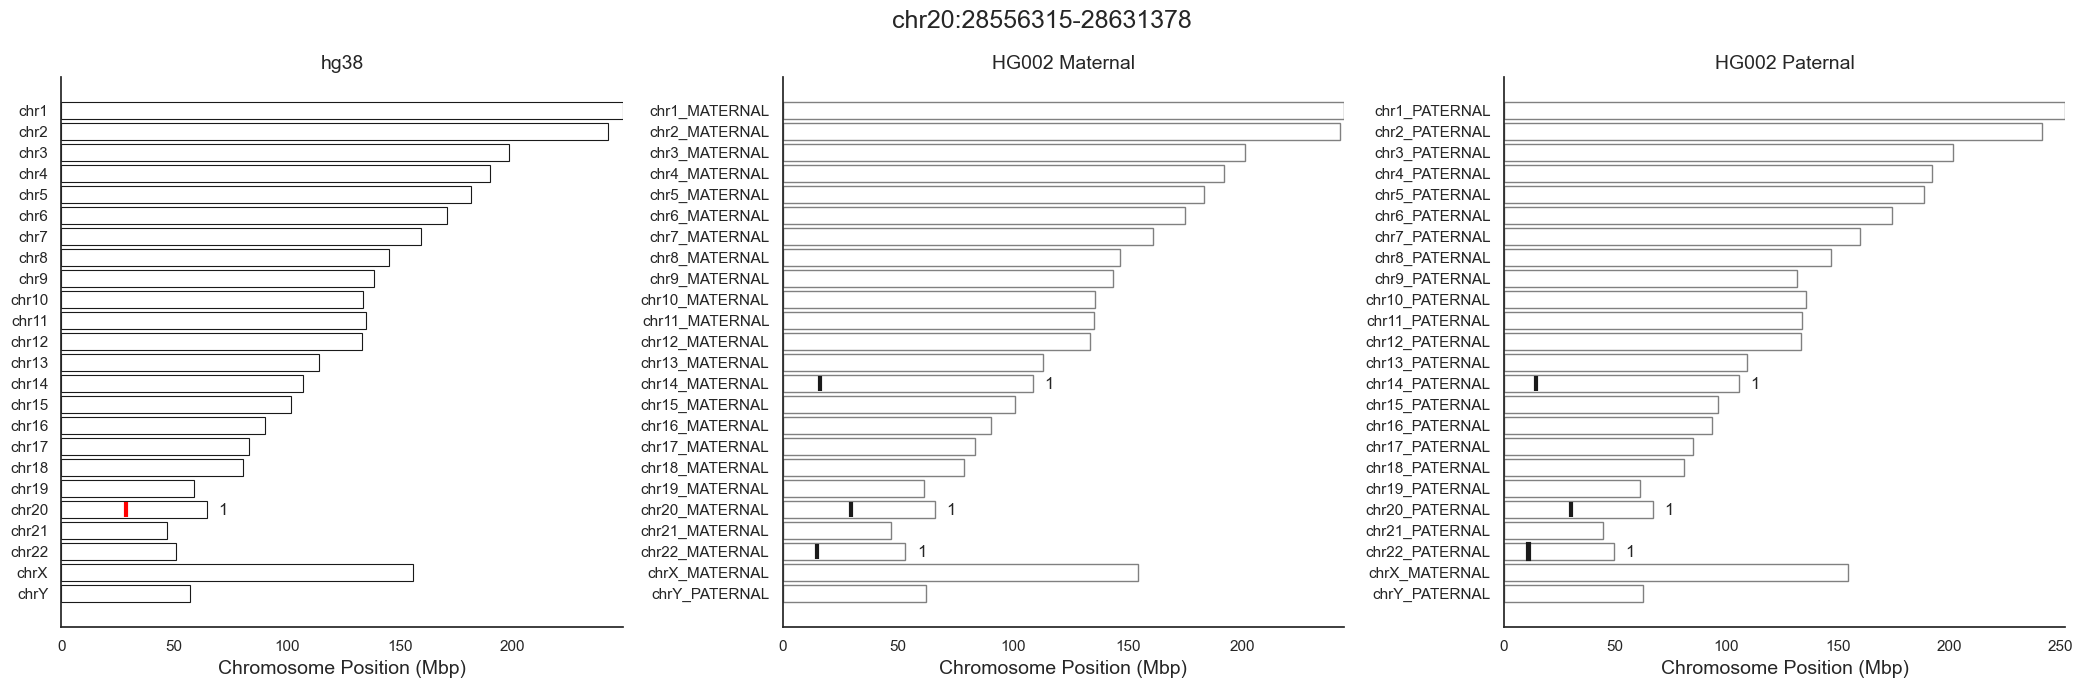

In [36]:
import T2T_ACE.alignment_visualization_utilities as avu
importlib.reload(avu)
avu.PlotIntervals(['chr20:28556315-28631378'], ["chr20_MATERNAL:29574351-29648569",
"chr22_MATERNAL:15065729-15139005",
"chr14_MATERNAL:16224924-16298185",
"chr20_PATERNAL:30145522-30219691",
"chr22_PATERNAL:11042686-11115976",
"chr14_PATERNAL:14306669-14379932"]).chromosome_karyotype_plot()